Group 5:\
Abed E.D. ADOUNKPE\
Alexandre BENAMENYO\
Chloe GRANGEON\
Nazim Akram HADJ SEYD\
Rissel Mohamed El Moundhir ZARZI

In [ ]:
#This install command might take time to run, please wait.
#Downloading the right packages
!pip install -r requirements.txt

In [ ]:
#Downloading the right versions of scikit-learn and imblearn to solve a potential "ImportError" error
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

# I. Introduction

Sleep is a fundamental physiological process observed across the animal kingdom, including mammals. In the context of this machine learning project, two key variables that play a significant role in mammalian sleep are Total Sleep and Dreaming.

Predicting Total Sleep and Dreaming variables through machine learning models holds great potential for uncovering patterns and relationships within the data. It enables researchers to explore the impact of various features that can be general, ecological or biological.

The primary objectives of the machine learning project are to develop predictive models that can estimate Total Sleep and Dreaming durations based on relevant features.

# II. Data Exploration and Analysis

Initially, our project utilized the Sleep_merged.tsv dataset. Following insightful recommendations from our mentor, we introduced a new column named Family to the dataset. This addition proved useful in refining our machine learning models. To facilitate this enhancement, we converted the original TSV file into an Excel (XLSX) format, enabling us to incorporate the Family attribute. This modification not only enriched our dataset but also significantly improved the predictive accuracy of our models. This explains why the data set used in our project is called Sleep_merged.xlsx

In [5]:
import pandas as pd
import numpy as np
import openpyxl
df = pd.read_excel('Sleep_merged.xlsx')
df = df.replace(r'^\s*$', np.nan, regex=True) # to make sure spaces aren't read as data

In [6]:
df

,Family,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,Awake,TotalSleep,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,Elephantidae,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,20.7,3.3,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,Nesomyidae,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,15.7,8.3,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,Muridae,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,15.3,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canidae,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,11.5,12.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Sciuridae,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,7.4,16.6,NaN,NaN,NaN,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Cercopithecidae,Vervet,Cercopithecus,Primates,omni,lc,4.750,58.0,14.0,10.0,9.7,0.6,24.0,210.0,4.0,3.0,4.0
83,Cricetidae,Vesper mouse,Calomys,Rodentia,herbi,NaN,0.045,0.0,17.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Cricetidae,Vole,Microtus,Rodentia,herbi,NaN,0.035,0.0,11.2,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Didelphimorphia,Water opossum,Chironectes,Didelphimorphia,carni,lc,3.500,3.9,4.6,19.4,12.8,6.6,3.0,14.0,2.0,1.0,1.0


In [7]:
df.dtypes

Family           object
Species          object
Genus            object
Order            object
Vore             object
Conservation     object
BodyWt          float64
BrainWt         float64
Awake           float64
TotalSleep      float64
NonDreaming     float64
Dreaming        float64
LifeSpan        float64
Gestation       float64
Predation       float64
Exposure        float64
Danger          float64
dtype: object

### After importing our dataset, we see that we have 17 features, with a mix of 6 catagorical values (Family, Species, Genus, Order, Vore and Conservation) and 11 numerical values.

In [8]:
df.describe()

,BodyWt,BrainWt,Awake,TotalSleep,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,13.393103,10.608046,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.467481,4.465793,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,4.100000,1.900000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,10.250000,8.150000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,13.700000,10.300000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,15.850000,13.750000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,22.100000,19.900000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


### The describe function gives us more details about the numerical values, we notice that the count yields different values, suggesting that we have NaN values in our dataframe for some columns.

In [9]:
df.isna().sum()

Family           0
Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
Awake            0
TotalSleep       0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

### The output above shows that there are 29  missing values in Conservation, 40 in NonDreaming, 24 in Dreaming, 33 in LifeSpan and Gestation and 29 in Predation, Exposure and Danger

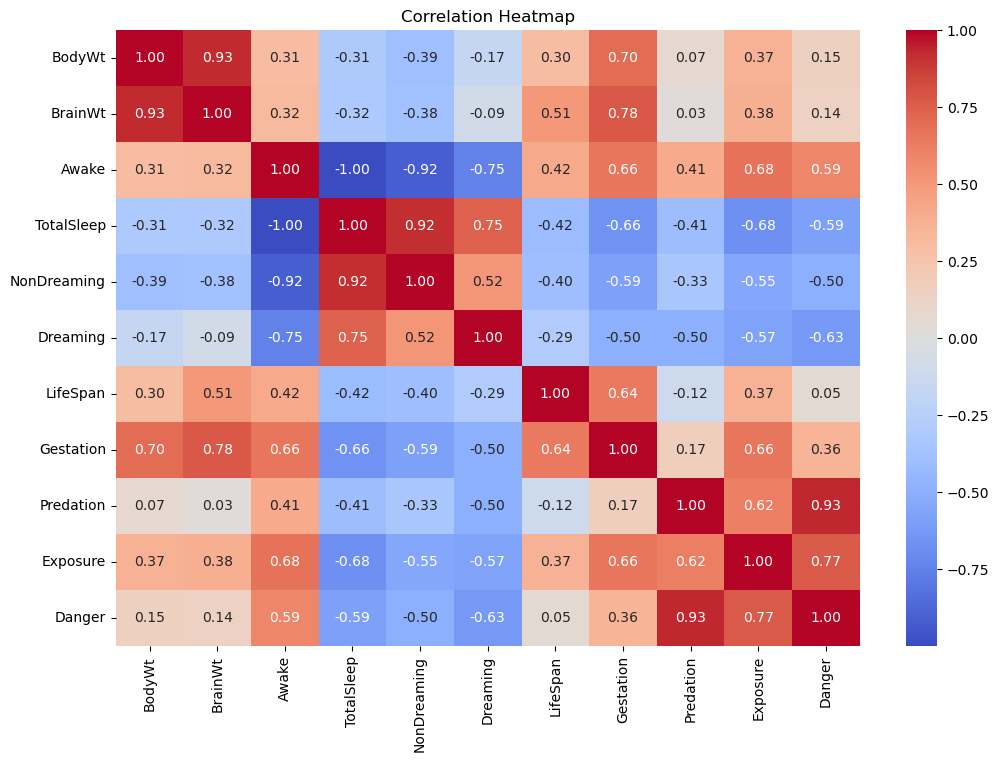

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### To check the correlation between the total sleep duration and the other features, we create a heatmap to visualize the correlation matrix which shows the relationships between all features.
### We notice that there are relatively important negative correlations between the feature TotalSleep and Exposure, Gestation and Danger.

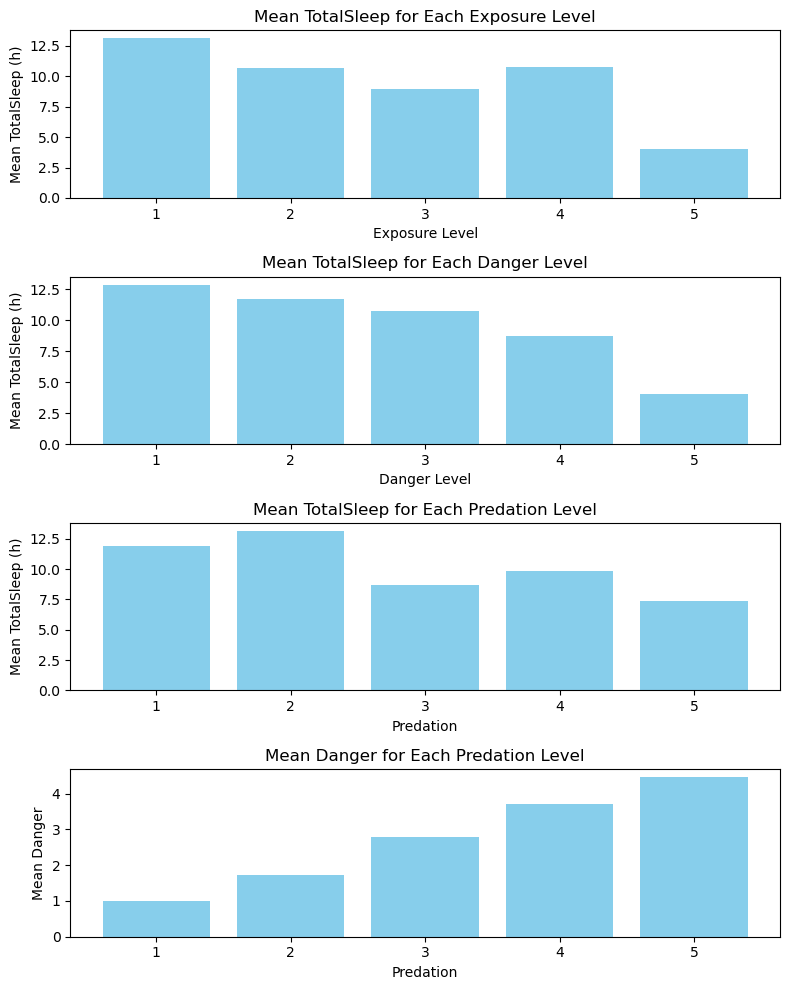

In [11]:
mean_df_dg_ttsleep = df.groupby('Danger')['TotalSleep'].mean().reset_index()

mean_df = df.groupby('Predation')['TotalSleep'].mean().reset_index()
# Plot Mean Danger for each Predation Level
mean_df_prd_dg = df.groupby('Predation')['Danger'].mean().reset_index()
mean_df_exp=df.groupby('Exposure')['TotalSleep'].mean().reset_index()
# Create subplots with two rows and one column
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

# Plot 1: Mean TotalSleep for each Danger Level


axes[0].bar(mean_df_exp['Exposure'], mean_df_exp['TotalSleep'], color='skyblue')
axes[0].set_xlabel('Exposure Level')
axes[0].set_ylabel('Mean TotalSleep (h)')
axes[0].set_title('Mean TotalSleep for Each Exposure Level')

axes[1].bar(mean_df_dg_ttsleep['Danger'], mean_df_dg_ttsleep['TotalSleep'], color='skyblue')
axes[1].set_xlabel('Danger Level')
axes[1].set_ylabel('Mean TotalSleep (h)')
axes[1].set_title('Mean TotalSleep for Each Danger Level')

# Plot 2: Mean Danger for each Predation Level
axes[2].bar(mean_df['Predation'], mean_df['TotalSleep'], color='skyblue')
axes[2].set_xlabel('Predation')
axes[2].set_ylabel('Mean TotalSleep (h)')
axes[2].set_title('Mean TotalSleep for Each Predation Level')

axes[3].bar(mean_df_prd_dg['Predation'], mean_df_prd_dg['Danger'], color='skyblue')
axes[3].set_xlabel('Predation')
axes[3].set_ylabel('Mean Danger')
axes[3].set_title('Mean Danger for Each Predation Level')



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Calculating the mean total sleep duration for each level of exposure and creating a bar plot shows that the total sleep duration generally decreases as the exposure increases. As we have missing values in our dataset, the fourth bar doesn't follow the decreasing trend (as its height is bigger than the third).
### The bar plot of the mean total sleep duration for each value of predation shows that the total sleep duration gets lower as the danger level of the mammal increases. This is a coherent analysis, since an animal that is most likely to face danger sleeps less. On the other hand, the bar plot of mean sleep duration vs. predation shows that the total sleep decreases as predation increases, if we exclude the second and fourth bars. The reason behind the fact that the trend isn't monotonic might come from the missing values that we have in our dataset. One way to verify the trend is to look at the bar plot of the mean danger vs. predation. Indeed, that plot shows that the mean danger increases as predation increases, which means that the danger level of the mammal increases as the mammal is more likely to be preyed upon. 
### In conclusion, a mammal that is more exposed, one that is more likely to be preyed upon or more generally one that faces more danger, is more likely to sleep less.

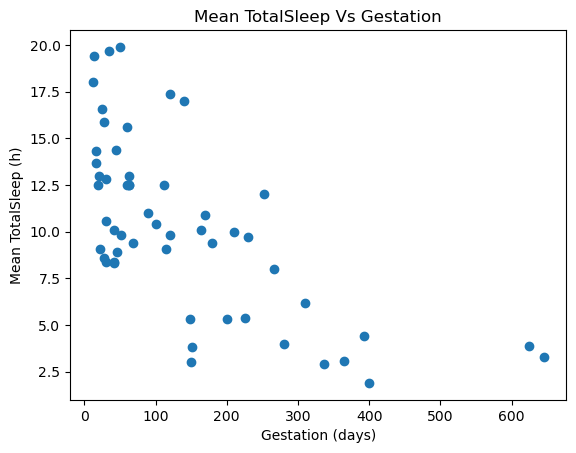

In [12]:
plt.scatter(df['Gestation'], df['TotalSleep'])
plt.xlabel('Gestation (days)')
plt.ylabel('Mean TotalSleep (h)')
plt.title('Mean TotalSleep Vs Gestation')
plt.show()


### To look deeper into the negative correlation between total sleep and gestation, we plotted the values of TotalSleep Vs Gestation. The plot confirms that the total sleep duration decreases as the gestation duration increases. This means that mammals that have a longer gestation duration experience less sleep.

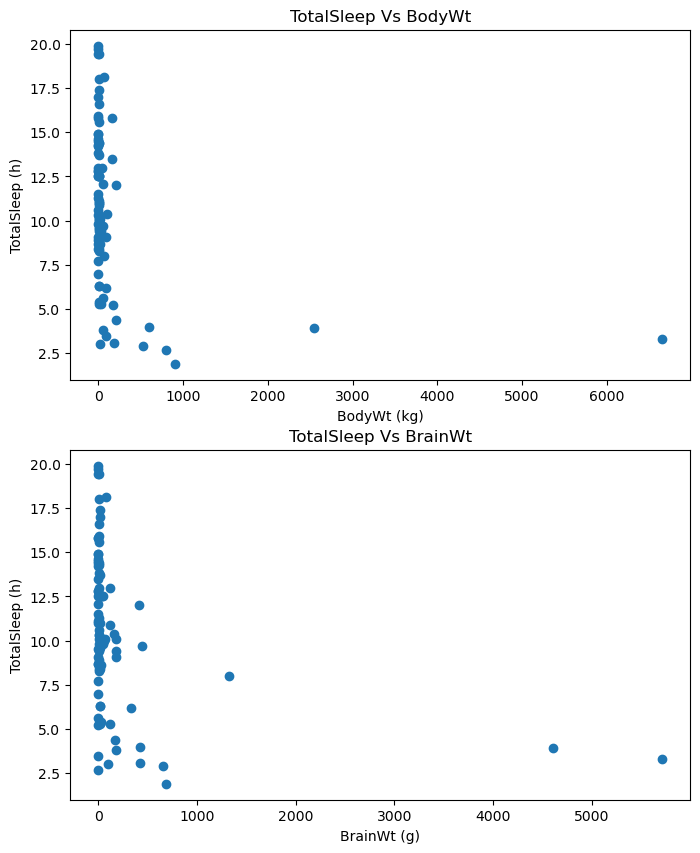

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
axes[0].scatter(df['BodyWt'], df['TotalSleep'])
axes[0].set_xlabel('BodyWt (kg)')
axes[0].set_ylabel('TotalSleep (h)')
axes[0].set_title('TotalSleep Vs BodyWt')

axes[1].scatter(df['BrainWt'], df['TotalSleep'])
axes[1].set_xlabel('BrainWt (g)')
axes[1].set_ylabel('TotalSleep (h)')
axes[1].set_title('TotalSleep Vs BrainWt')

plt.show()

### Plotting the total sleep durations Vs body weight values doesn't show a clear trend, but we can at least see that larger mammals tend to have a lower sleep duration, which is coherent with the negative correlation coefficient that we've seen on the correlation matrix.
### The plot of the total sleep duration Vs body weight values shows a similar trend, but what we can also notice is that the distribution of sleep values vs body weight values and the one of sleep values vs brain weight values are almost the same, which lets us believe that both provide the same information. This statement is althemore true, as we observe on the correlation matrix that both have almost the same correlation coefficient (-0.31 and -0.32) in regard to their correlation with TotalSleep. Indeed, larger mammals tend to have larger brains.


## Conclusion

### Our dataset consists of 87 rows, with a mix of 11 numerical features and 6 categorical features. The Correlation matrix and the plots show that the total sleep duration is negatively correlated with Exposure, Gestation, Danger, Predation, BodyWt and BrainWt. Indeed, we've shown that mammals who have higher levels of Exposure, Danger and Predation experience less sleep. Moreover, larger mammals (that tend to have larger brains as well), also experience less sleep.

# III. Data Preprocessing

## III.1 Filling the missing values

In [14]:
df.isna().sum()

Family           0
Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
Awake            0
TotalSleep       0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

### The df.isna().sum() gives us indications about the number of missing values in each column. 
### Considering the fact that we have 87 rows, we can't drop the rows where we have missing values, it would indeed shorten even more our dataset. Se we decided to fill the missing values for categorical and numerical features. We filled some of them using real data that we found online and for the remaining ones where no real data was found, we decided to apply an iterative imputer.

## III.1.a Filling Conservation, LifeSpan and Gestation using online documentation

In [15]:
# replacing the conservation missing values using IUCN Redlist source https://www.iucnredlist.org/
# creating a function to fill in CONSERVATION status
#takes a list, iterates and changes the value of conservation status

def fill(list,word): 
    for i in list :
        df.at[i,'Conservation']=word
    return df


enf = [12, 46]
df=fill(enf,'en')
lcf = [75, 27, 65, 3, 66, 8, 59, 71, 57, 26, 41, 6, 73, 83, 1, 86, 84, 17,2,15,49,23,81]
df=fill(lcf,'lc')
vuf = [72,48,78]
df=fill(vuf,'vu')

df.at[62, 'Conservation'] = 'cr'

### With the code above, we managed to fill the Conservation missing values using data we found online.

In [16]:
#filling in the LifeSpan NAs
# finding the indexes where there are Na values first 
nonls_indexes = df[df['LifeSpan'].isna()].index
print("the indexes of LifeSpan's missing values' are :",nonls_indexes.values)
nonges_indexes = df[df['Gestation'].isna()].index
print("the indexes of Gestation's missing values' are :",nonges_indexes.values)

the indexes of LifeSpan's missing values' are : [ 2  4  8 10 11 14 15 17 18 19 20 23 34 37 45 49 50 51 52 55 56 61 62 63
 69 73 76 77 78 79 83 84 86]
the indexes of Gestation's missing values' are : [ 2  8 10 11 14 15 17 18 19 20 23 27 28 34 37 45 50 51 55 56 61 62 63 69
 73 74 76 77 78 79 83 84 86]


In [17]:
#filing the life span and gestation columns using documentation 
#(view word file for sources) 
#lifeSpan
def fillLS(list,int): 
    for i in list :
        df.at[i,'LifeSpan']=int

lslist3 = [23,50]
fillLS(lslist3, 3)
lslist4 = [18,19,69]
fillLS(lslist4, 4)
lslist5 = [56,76]
fillLS(lslist5, 5)
lslist9 = [14,4]
fillLS(lslist9, 9)
lslist12 = [20,45]
fillLS(lslist12, 12)

df.at[17,'LifeSpan']=1
df.at[83,'LifeSpan']=1.5
df.at[37,'LifeSpan']=1.6
df.at[15,'LifeSpan']=1.9
df.at[77,'LifeSpan']=2
df.at[86,'LifeSpan']=2.5
df.at[2,'LifeSpan']=4.5
df.at[84,'LifeSpan']=4.8
df.at[52,'LifeSpan']=6
df.at[34,'LifeSpan']=10.5
df.at[79,'LifeSpan']=13
df.at[62,'LifeSpan']=14
df.at[63,'LifeSpan']=15
df.at[73,'LifeSpan']=18
df.at[11,'LifeSpan']=20
df.at[55,'LifeSpan']=22
df.at[78,'LifeSpan']=25
df.at[51,'LifeSpan']=36
df.at[8,'LifeSpan']=40
df.at[49,'LifeSpan']=41
df.at[10,'LifeSpan']=43
df.at[61,'LifeSpan']=50

df['LifeSpan'].isna().sum() #no more na for lifespan

0

In [18]:
#filing the life span and gestation columns using documentation is what I'm doing right now

#Gestation
def fillG(list,int): 
    for i in list :
        df.at[i,'Gestation']=int


glist21 = [2,37]
fillG(glist21, 21)
glist25 = [17,50]
fillG(glist25, 25)
glist28 = [69,77]
fillG(glist28, 28)
glist330 = [55,10,14]
fillG(glist330, 330)

df.at[76,'Gestation']=14
df.at[84,'Gestation']=21
df.at[83,'Gestation']=22
df.at[15,'Gestation']=27
df.at[86,'Gestation']=30
df.at[23,'Gestation']=31
df.at[56,'Gestation']=32
df.at[19,'Gestation']=37
df.at[62,'Gestation']=38
df.at[74,'Gestation']=45
df.at[20,'Gestation']=63
df.at[27,'Gestation']=75
df.at[18,'Gestation']=90
df.at[11,'Gestation']=93
df.at[79,'Gestation']=102
df.at[45,'Gestation']=115
df.at[51,'Gestation']=128
df.at[73,'Gestation']=147
df.at[78,'Gestation']=150
df.at[63,'Gestation']=193
df.at[8,'Gestation']=360
df.at[61,'Gestation']=450
df.at[28,'Gestation']=120
df.at[34,'Gestation']=210

df['Gestation'].isna().sum() #no more na for gestation

0

In [19]:
df.isna().sum()

Family           0
Species          0
Genus            0
Order            0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
Awake            0
TotalSleep       0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

## III.1.b Filling some of the Dreaming missing values using NonDreaming 

### Before moving to the Dreaming values, we noticed for the TotalSleep feature, that some values weren't coherent with the given formula "NonDreaming + Dreaming = 24", so we start by creating a temporary column "RealTotSleep", we plot the values to observe the diffrences and then we replace all the values of TotalSleep using TotalSleep= 24- Awake

In [20]:
df['RealTotSleep'] = 24 - df['Awake']

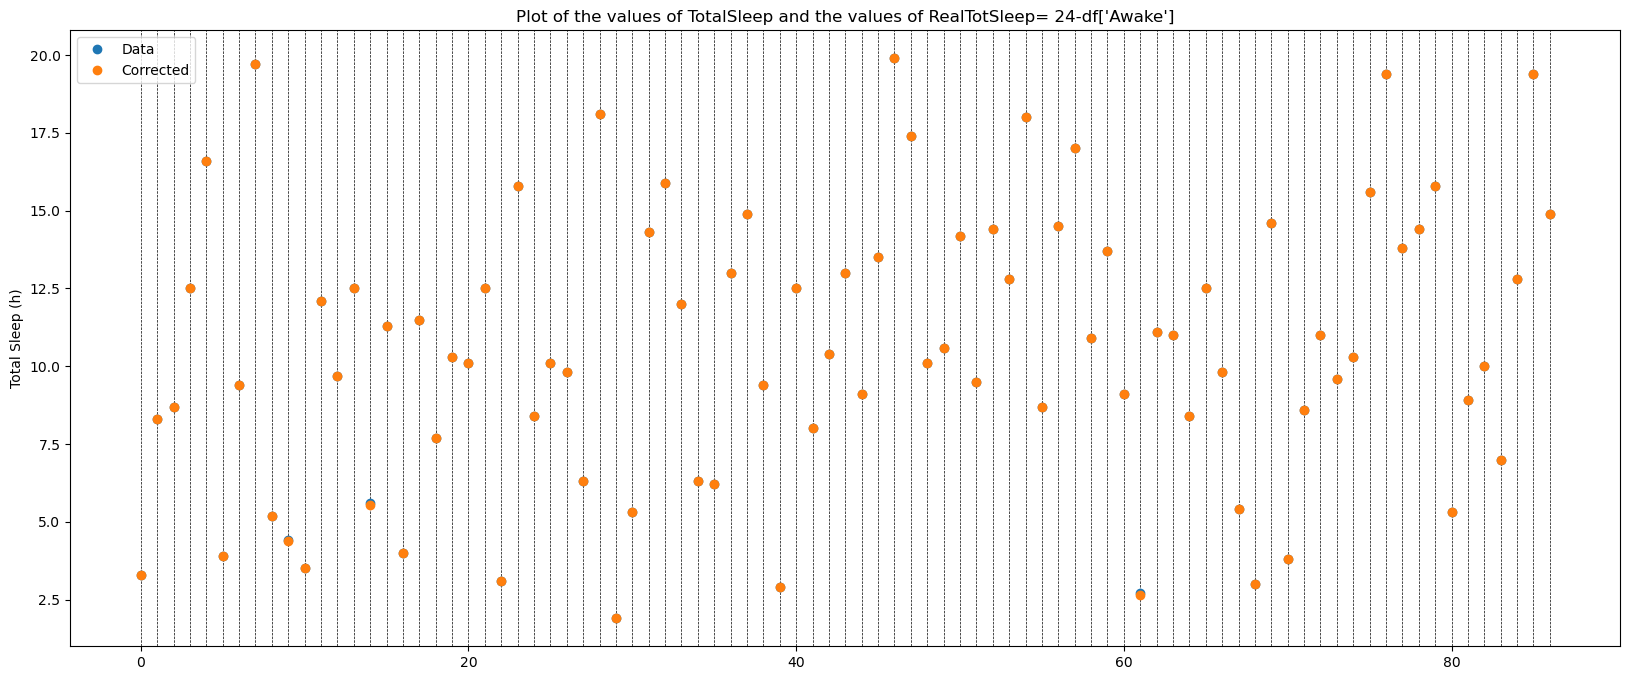

In [21]:
#making a plot to see the difference between RtotSleep and TotalSleep
plt.figure(figsize=(20, 8))

plt.plot(df['TotalSleep'], label='Data', marker='o', linestyle='', zorder=1)
plt.plot(df['RealTotSleep'], label='Corrected', marker='o', linestyle='', zorder=2)
plt.ylabel('Total Sleep (h)')
for i in range(0, df.shape[0]):
    plt.gca().axvline(x=i, ls='--', c='black', lw=0.5, zorder=0)

plt.legend()
plt.title("Plot of the values of TotalSleep and the values of RealTotSleep= 24-df['Awake']")
plt.show()


### We can observe that there's a difference for 2 values

In [22]:
#now we make sure to fill in as much possible of na values in dreaming and non-dreaming
" Since Awake + TotalSleep = 24 and Dreaming+NonDreaming = Total Sleep we can find out a lot of missing data but not all"
(df['RealTotSleep'] == df['TotalSleep']).describe()
#there are 2 points were this = false so we replace Total Sleep by RtotSleep

count       87
unique       2
top       True
freq        70
dtype: object

In [23]:
#changing the columntotal sleep to the real total sleep
df["TotalSleep"] = df["RealTotSleep"]
df = df.drop("RealTotSleep", axis=1)
# you can only run this code once since it can't drop a dropped column already

### After replacing the 2 TotalSleep values, we noticed that on the rows where some of the NonDreaming values were missing, we had non-missing Dreaming values. So we proceeded to fill the NonDreaming values for which Dreaming values were available, using the relationship between the two features "NonDreaming=TotalSleep-Dreaming".

In [24]:
#looking at the data, I found a pattern that Nd = TotSleep – Dreaming and only Nd can be filled.
#Let's create a function to fill in NAs
def ndNAfiller(list, df) -> df : 
    for i in list:
        if i in df.index :
                df.at[i, 'NonDreaming'] = df.at[i,'TotalSleep'] - df.at[i,'Dreaming']
        else:
            print("error, index not in df")
    return df['NonDreaming'].isna().sum()

In [25]:
# finding the indexes where there are Na values first in Dreaming column 

dr_indexes = df[df['Dreaming'].isna()].index
dr_indexes

Int64Index([ 0,  2,  3,  4,  8, 11, 14, 17, 23, 33, 36, 42, 45, 56, 63, 65, 68,
            69, 71, 72, 79, 83, 84, 86],
           dtype='int64')

In [26]:
# finding the indexes where there are Na values in NonDreaming column 
nondr_indexes = df[df['NonDreaming'].isna()].index
nondr_indexes

Int64Index([ 0,  2,  3,  4,  8, 10, 11, 14, 15, 17, 18, 20, 22, 23, 29, 33, 34,
            36, 37, 42, 45, 50, 51, 55, 56, 61, 62, 63, 65, 68, 69, 72, 73, 76,
            77, 78, 79, 83, 84, 86],
           dtype='int64')

In [27]:
#using the function and filling NA values in Dreaming and NonDreaming
df.at[71, 'Dreaming'] = df.at[71,'TotalSleep'] - df.at[71,'NonDreaming']
ndl = [10,15,18,20,22,29,34,37,50,51,55,61,62,73,76,77,78]
ndNAfiller(ndl,df)

23

### After filling NonDreaming missing values using "NonDreaming= TotalSleep- Dreaming", we still have 23 missing values that have the same indexes in both Dreaming and NonDreaming columns. We can conclude there is no other way to fill in this missing data unless we use a statistical way, which will be detailed a bit later in this notebook.

## III.2 Encoding String Values

In [28]:
from sklearn.preprocessing import LabelEncoder
def replace_strings_by_ints(df_init: pd.DataFrame, list_columns: list, list_dict:list) -> pd.DataFrame:
   
    df = df_init.copy()
    for i, d in enumerate(list_dict):
        df[list_columns[i]] = df[list_columns[i]].replace(d)

columns_list=df.select_dtypes(include=object).columns.values #we get the names of the columns that have an object type
le = LabelEncoder()
for col in columns_list:
    df[col]=le.fit_transform(df[col])

# III.3 Filling Predation, Exposure, Danger, NonDreaming and Dreaming using the multivariate imputer


### To fill the features NonDreaming, Danger, Exposure, and Predation, we decided to use multivariate imputation, which is a more efficient method than the univariate method.
### Indeed, this method predicts the missing values of a feature using the other features. However, which features/columns should we use to get the best possible result?
### One way to answer this question would be to calculate the mean squared error for each possible combination of features every time we apply the multivariate imputer to predict missing values of the features.
### To do so, we proceed to drop the NaN values of the feature of interest and replace with NaNs the last 10 values  before applying the multivariate imputer. We then predict the NaN values we introduced, and compare them with the ones present in our initial dataframe. Finally, We calculate the MSE and iterate over all possible column combinations until we get the combination that produces the smallest MSE. We then do the same thing for the other columns that we want to fill.
### Given the relationship between Dreaming and NonDreaming (TotalSleep = Dreaming + NonDreaming), predicting NonDreaming is enough to fill both since we can simply use Dreaming = TotalSleep - NonDreaming to get the Dreaming missing values.

In [29]:
from sklearn.experimental import enable_iterative_imputer  # This is necessary for some versions of sklearn
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

def error(df, df_imputed, fixed_element):
    return mean_squared_error(df_imputed[fixed_element], df[fixed_element].dropna())

def multivariate_imputer(df_in, combination, fixed_element, test):
    impute_it = IterativeImputer()
    if test == 'yes':
        df_in = df_in[list(combination)].dropna()
        df_in[fixed_element][len(df_in[fixed_element]) - 10:] = np.nan
    imputed = impute_it.fit_transform(df_in)
    df_imputed = pd.DataFrame(data=imputed, columns=df_in.columns)
    return df_imputed

from itertools import combinations

elements = df.columns.values
elements = list(elements)

for e in ['Exposure', 'Danger', "Dreaming", "Predation", "NonDreaming"]: #We remove the featuers that have missing values
    elements.remove(e)

# Fixed element
fixed_elements = ['NonDreaming', 'Predation', 'Danger', 'Exposure']
df_min_list = []
min_error_list = []
min_comb_list = []

for fixed_element in fixed_elements:
    min_error = float('inf')
    for r in range(2, len(elements) + 1):  # Minimum combination size of 2
        combinations_with_fixed = list(combinations(elements, r - 1))
        for combination in combinations_with_fixed:
            combination += (fixed_element,)
            df_ = multivariate_imputer(df, combination, fixed_element, 'yes')
            current_error = error(df, df_, fixed_element)

            # Update minimum error and combination if a better combination is found
            if current_error < min_error:
                min_error = current_error
                min_error_combination = combination
                df_min = df_

    df_min_list.append(df_min)
    min_error_list.append(min_error)
    min_comb_list.append(min_error_combination)
    print(f"The best column combination for the multivariate imputer on {fixed_element} that produces the smallest error is",
          min_error_combination)



The best column combination for the multivariate imputer on NonDreaming that produces the smallest error is ('Family', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt', 'BrainWt', 'Awake', 'Gestation', 'NonDreaming')
The best column combination for the multivariate imputer on Predation that produces the smallest error is ('Genus', 'Vore', 'Conservation', 'Awake', 'LifeSpan', 'Predation')
The best column combination for the multivariate imputer on Danger that produces the smallest error is ('Genus', 'Vore', 'Conservation', 'TotalSleep', 'Danger')
The best column combination for the multivariate imputer on Exposure that produces the smallest error is ('Family', 'Species', 'Order', 'Conservation', 'BrainWt', 'TotalSleep', 'Exposure')


### The code above helped us get, for each feature that contains missing values, the combination that produces the smallest MSE after using the multivariate imputer.
### We then plot the predicted values and the actual ones for better visualization

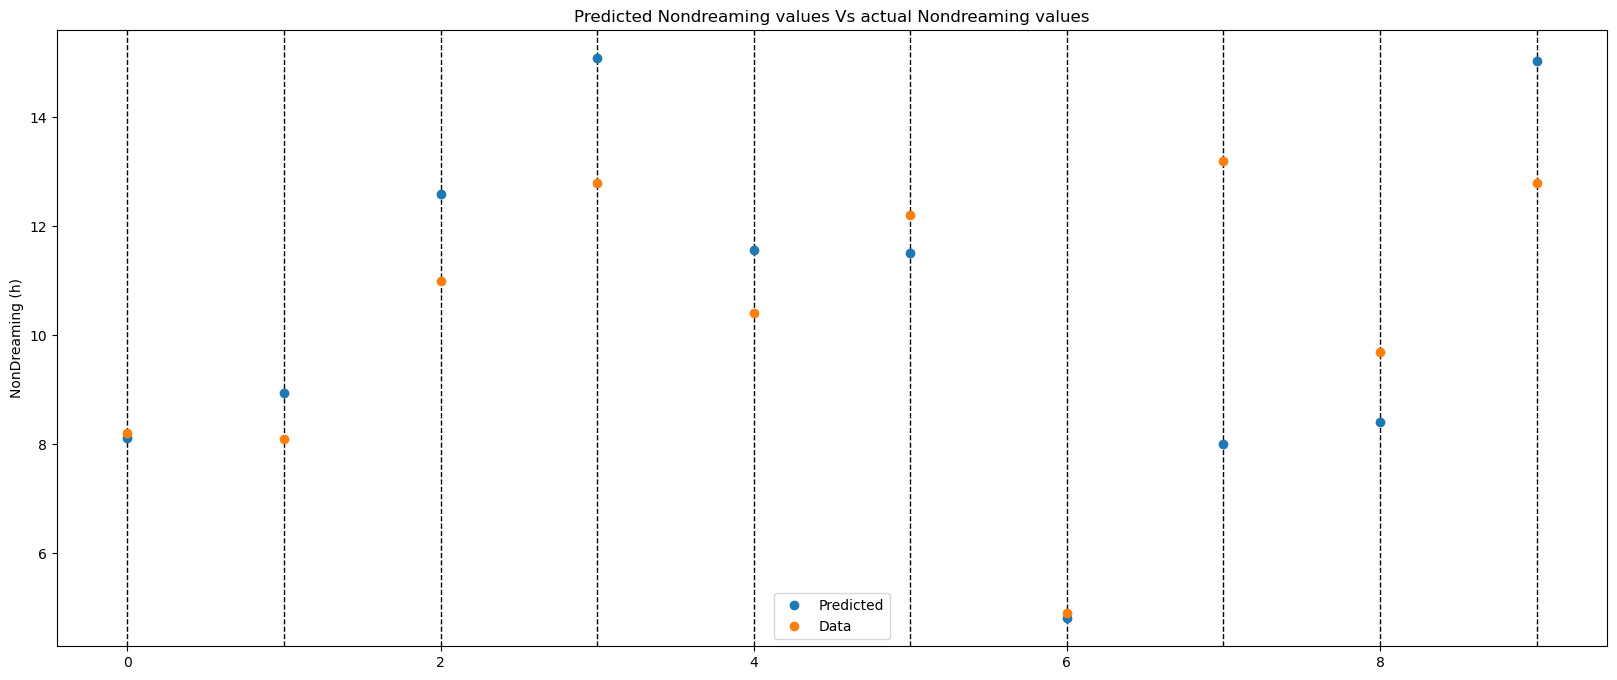

In [30]:
plt.figure(figsize=(20, 8))
df_p=df['NonDreaming'].dropna().values
plt.plot(df_min_list[0]['NonDreaming'].values[len(df_min_list[0]['NonDreaming'])-10:len(df_min_list[0]['NonDreaming'])], label='Predicted', marker='o', linestyle='', zorder=1)
plt.plot(df_p[len(df_p)-10:], label='Data', marker='o', linestyle='', zorder=2)
plt.ylabel('NonDreaming (h)')
for i in range(0, 10):
    plt.gca().axvline(x=i, ls='--', c='black', lw=1, zorder=0)

plt.legend()
plt.title('Predicted Nondreaming values Vs actual Nondreaming values')
plt.show()

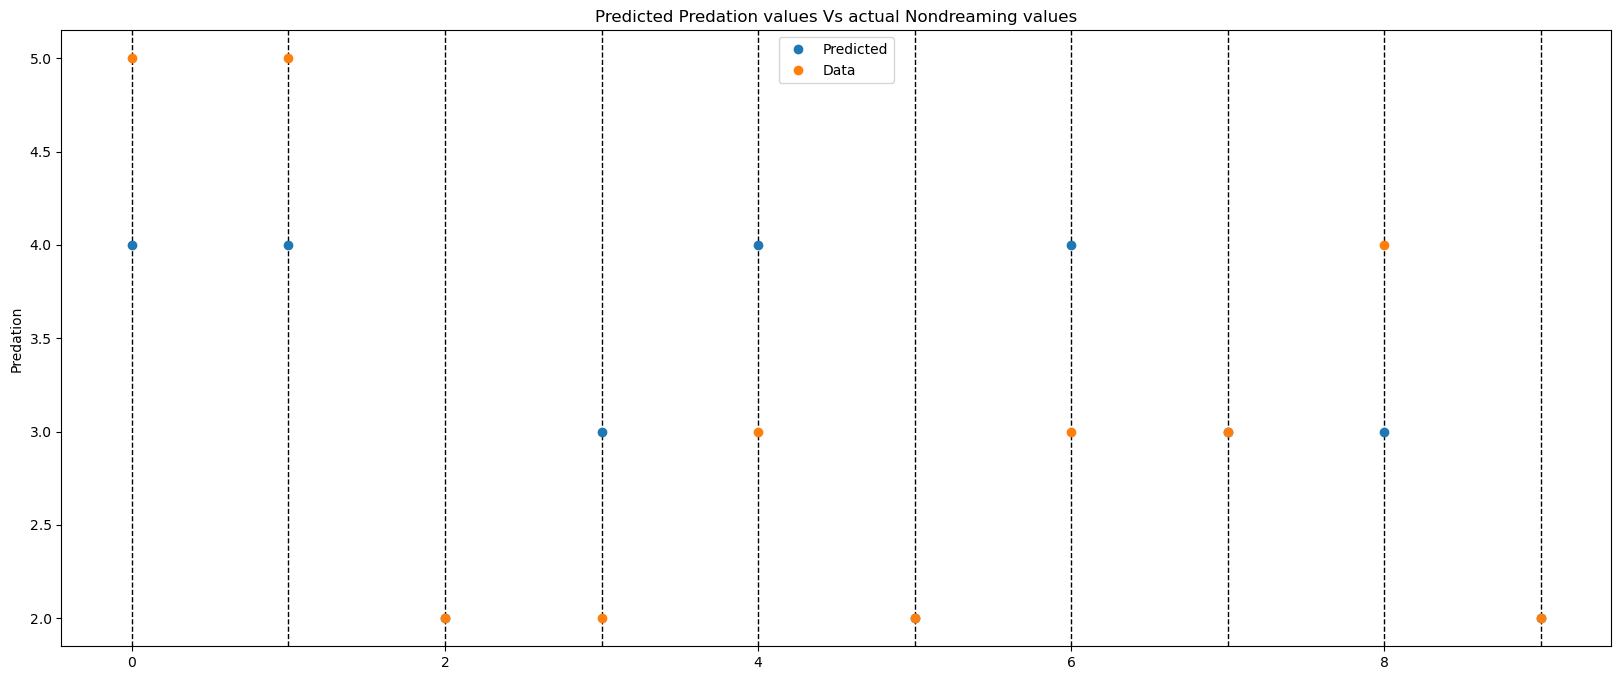

In [31]:
plt.figure(figsize=(20, 8))
df_p=df['Predation'].dropna().values
plt.plot(np.round(df_min_list[1]['Predation'].values)[len(df_min_list[1]['Predation'])-10:len(df_min_list[1]['Predation'])], label='Predicted', marker='o', linestyle='', zorder=1)
plt.plot(df_p[len(df_p)-10:], label='Data', marker='o', linestyle='', zorder=2)
plt.ylabel('Predation')
for i in range(0, 10):
    plt.gca().axvline(x=i, ls='--', c='black', lw=1, zorder=0)

plt.legend()
plt.title('Predicted Predation values Vs actual Nondreaming values')
plt.show()

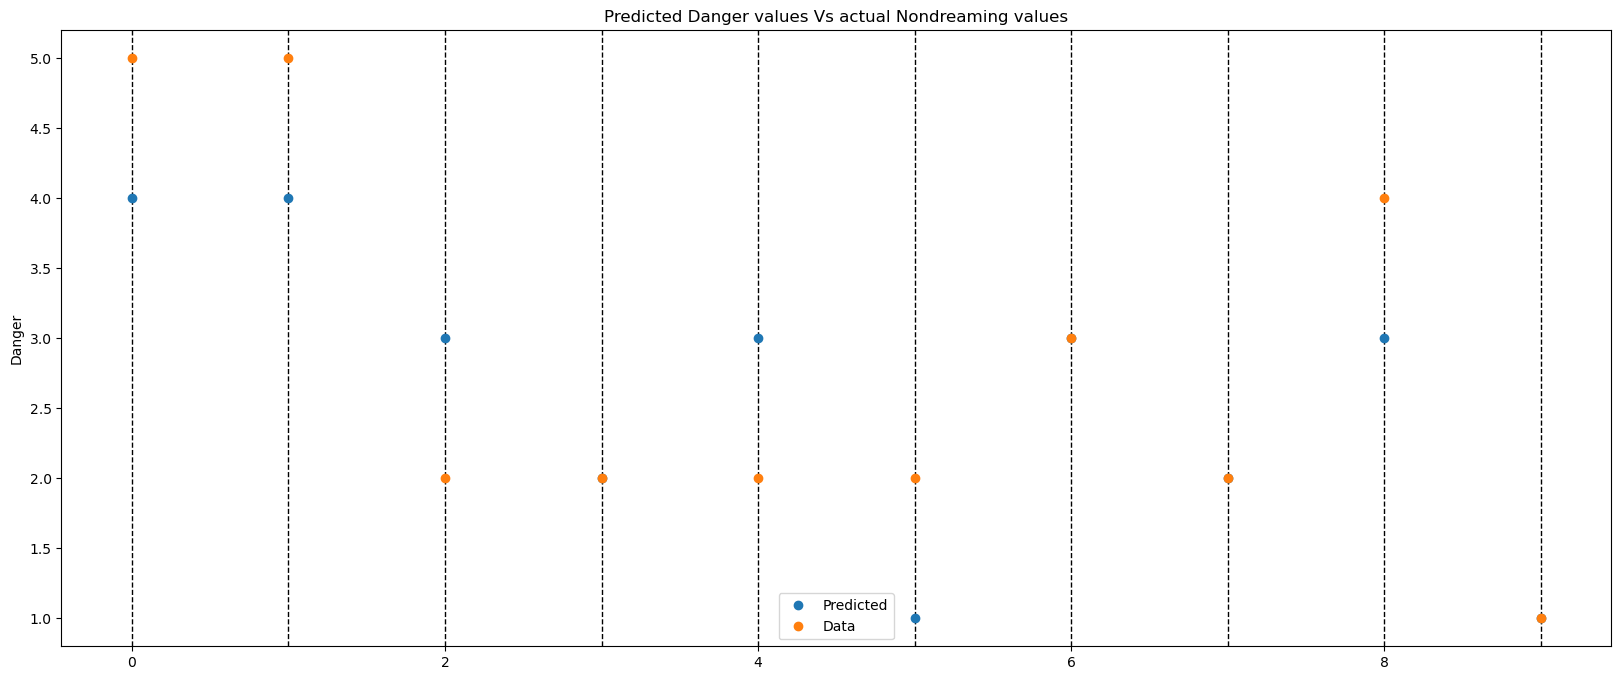

In [32]:
plt.figure(figsize=(20, 8))
df_p=df['Danger'].dropna().values
plt.plot(np.round(df_min_list[2]['Danger'].values)[len(df_min_list[2]['Danger'])-10:len(df_min_list[2]['Danger'])], label='Predicted', marker='o', linestyle='', zorder=1)
plt.plot(df_p[len(df_p)-10:], label='Data', marker='o', linestyle='', zorder=2)
plt.ylabel('Danger')
for i in range(0, 10):
    plt.gca().axvline(x=i, ls='--', c='black', lw=1, zorder=0)

plt.legend()
plt.title('Predicted Danger values Vs actual Nondreaming values')
plt.show()

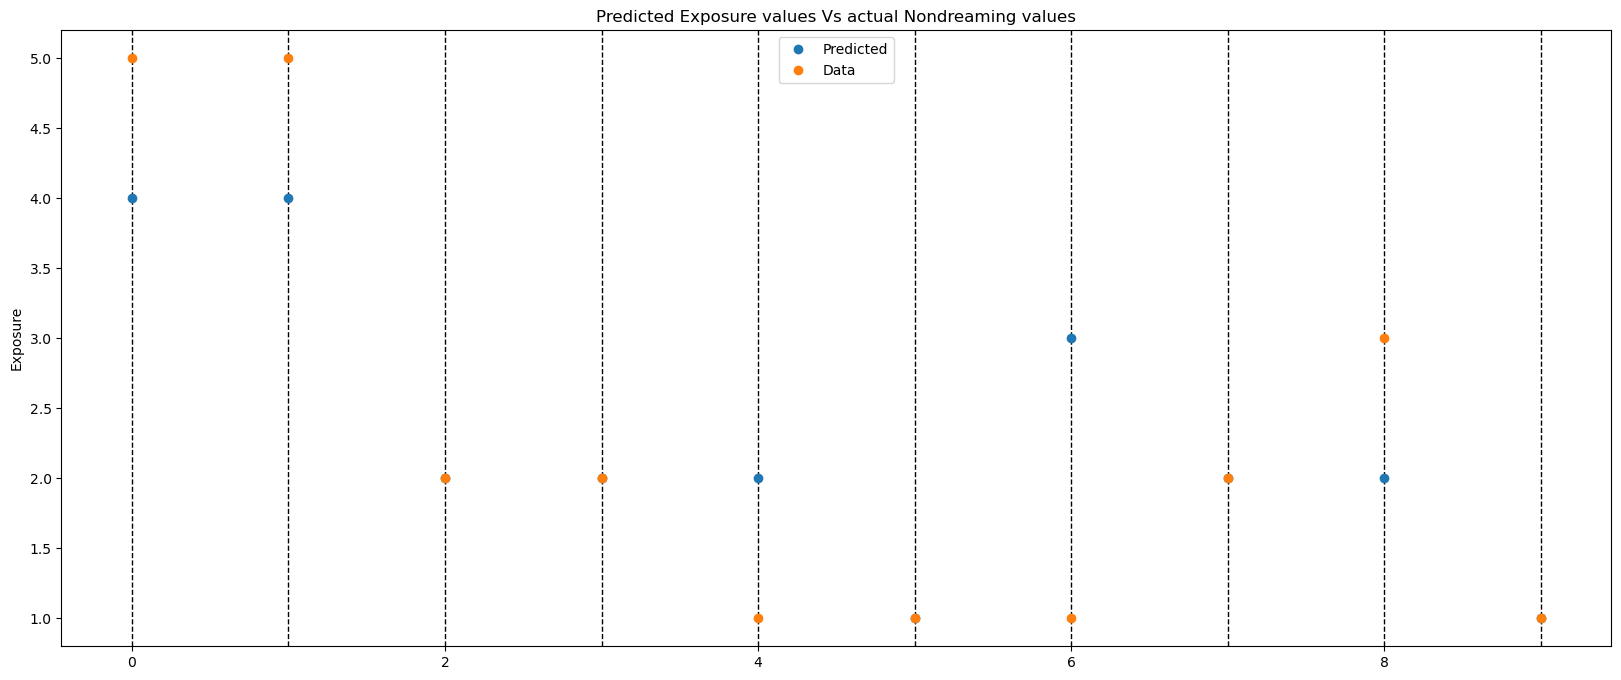

In [33]:
plt.figure(figsize=(20, 8))
df_p=df['Exposure'].dropna().values
plt.plot(np.round(df_min_list[3]['Exposure'].values)[len(df_min_list[3]['Exposure'])-10:len(df_min_list[3]['Exposure'])], label='Predicted', marker='o', linestyle='', zorder=1)
plt.plot(df_p[len(df_p)-10:], label='Data', marker='o', linestyle='', zorder=2)
plt.ylabel('Exposure')
for i in range(0, 10):
    plt.gca().axvline(x=i, ls='--', c='black', lw=1, zorder=0)

plt.legend()
plt.title('Predicted Exposure values Vs actual Nondreaming values')
plt.show()

### The results are good enough on our 10 value sample, we can therefore proceed to apply the multivariate imputer on the remaining missing values of our dataframe with the feature combinations that we've obtained.

In [34]:
#We replace the missing values with the ones given by the multivariate imputer
j=0
for i in min_comb_list :
    df_imp=multivariate_imputer(df,i,fixed_elements[j],'non')
    if fixed_elements[j]!='NonDreaming' :
        df[fixed_elements[j]]=np.round(df_imp[fixed_elements[j]])
    else :
        df[fixed_elements[j]]=df_imp[fixed_elements[j]]
    j=j+1

df['Dreaming']=abs(df['TotalSleep']-df['NonDreaming'])

In [35]:
df.isna().sum()

Family          0
Species         0
Genus           0
Order           0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
Awake           0
TotalSleep      0
NonDreaming     0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

## We managed to fill all the missing values, we are now ready for the Machine Learning Part

# IV Machine Learning

### Given the correlation coefficients, the link between TotalSleep and Awake (TotalSleep=24-Awake), and the link between Dreaming, NonDreaming and TotalSleep (TotalSleep=Dreaming+NonDreaming), we're not going to consider the features Awake, NonDreaming and Dreaming for TotalSleep prediction, to avoid multicollinearity. Exposure, Gestation and Danger show relatively high positive correlations with TotalSleep, while LifeSpan, BrainWt, BodyWt, Predation and Species show moderate positive correlations. We also note that BodyWt and BrainWt tend to have the same positive correlation coefficients, suggesting that they provide the same information and therefore we can consider only BodyWt, as it also makes sense for a large mammal to have a large brain.

### The correlation matrix indicates a correlation between TotalSleep (target feature) and the other features, and Dreaming and the other features. We can therefore consider at first Linear Regression as a modeling choice. Indeed, Linear Regression assumes a linear relationship between the predictor variables and the target variable and the information provided by the correlation coefficients indicate there might be a strong enough linear correlation to choose a linear model.
### We will then be looking at other non linear models : Random Forest, XGBoost and a neural network model. These models might capture relationships between features that weren't captured by linear regression.

In [36]:
#We display the correlation coefficients for both TotalSleep and Dreaming
correlation_matrix = df.corr()
target_correlation = correlation_matrix['TotalSleep'].abs().sort_values(ascending=False)
print(target_correlation)
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Dreaming'].abs().sort_values(ascending=False)
print(target_correlation)


Awake           1.000000
TotalSleep      1.000000
NonDreaming     0.938516
Exposure        0.710701
Dreaming        0.687006
Gestation       0.660818
Danger          0.525691
LifeSpan        0.464887
BrainWt         0.319476
BodyWt          0.310119
Predation       0.230742
Species         0.214370
Conservation    0.141664
Order           0.124571
Vore            0.065938
Genus           0.040968
Family          0.021276
Name: TotalSleep, dtype: float64
Dreaming        1.000000
Awake           0.687006
TotalSleep      0.687006
Exposure        0.505899
NonDreaming     0.472658
Gestation       0.404799
Danger          0.404563
LifeSpan        0.348437
Predation       0.163287
Conservation    0.142201
Species         0.115733
Vore            0.096868
Order           0.087734
Family          0.042992
Genus           0.033816
BrainWt         0.015522
BodyWt          0.002895
Name: Dreaming, dtype: float64


### We set a threshold of 0.1 to select our features for both TotalSleep and Dreaming. We therefore won't be selecting features that have a correlation coefficient lower than 0.1.

## IV.1 Linear Regression with 87 rows

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
# X takes all the features and y the target variable
X_ttsleep = df.drop(['Awake','Dreaming','NonDreaming','TotalSleep','Genus','Family','BrainWt','Order','Vore'], axis=1)  # Drop the target variable column
y_ttsleep = df['TotalSleep']

X_dreaming = df.drop(['Awake','Dreaming','NonDreaming','TotalSleep','Genus','Family','BrainWt','Order'], axis=1)  # Drop the target variable column
y_dreaming = df['Dreaming']
# We split the datasets into a training and a testing set
X_train_ttsleep, X_test_ttsleep, y_train_ttsleep, y_test_ttsleep = train_test_split(X_ttsleep, y_ttsleep, test_size=0.2, random_state=42)
X_train_dreaming, X_test_dreaming, y_train_dreaming, y_test_dreaming = train_test_split(X_dreaming, y_dreaming, test_size=0.2, random_state=42)
# We initialize and train the model
model = LinearRegression()
model.fit(X_train_ttsleep, y_train_ttsleep)
y_pred_ttsleep= model.predict(X_test_ttsleep)
model = LinearRegression()
model.fit(X_train_dreaming, y_train_dreaming)
y_pred_dreaming= model.predict(X_test_dreaming)

In [39]:
# We evaluate the model
mse_ttsleep = mean_squared_error(y_test_ttsleep, y_pred_ttsleep)
print(f'Mean Squared Error for TotalSleep using linear regression: {mse_ttsleep} h^2')
print(f'Root Mean Squared Error for TotalSleep using linear regression: {np.sqrt(mse_ttsleep)} h')
mse_dreaming = mean_squared_error(y_test_dreaming, y_pred_dreaming)
print(f'Mean Squared Error for Dreaming using linear regression: {mse_dreaming} h^2')
print(f'Root Mean Squared Error for TotalSleep using linear regression: {np.sqrt(mse_dreaming)} h')

Mean Squared Error for TotalSleep using linear regression: 12.114330110696201 h^2
Root Mean Squared Error for TotalSleep using linear regression: 3.4805646252721987 h
Mean Squared Error for Dreaming using linear regression: 3.114267663957811 h^2
Root Mean Squared Error for TotalSleep using linear regression: 1.7647287791493091 h


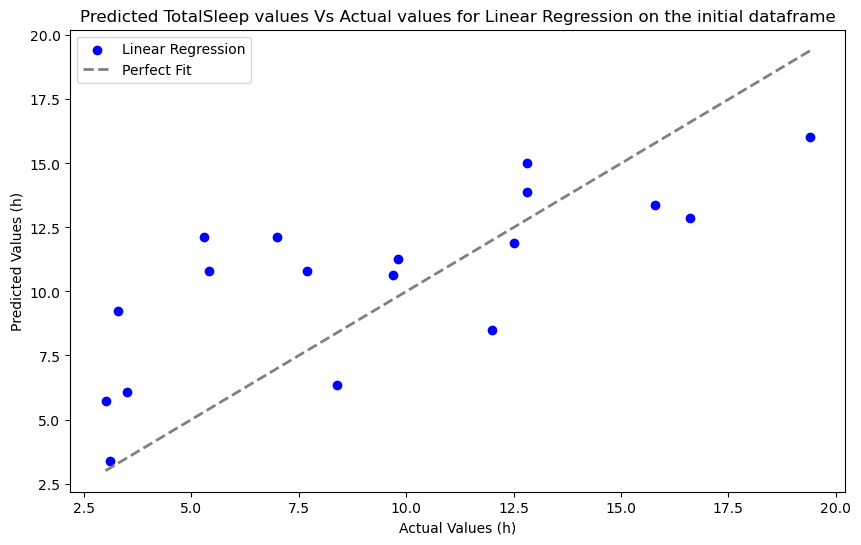

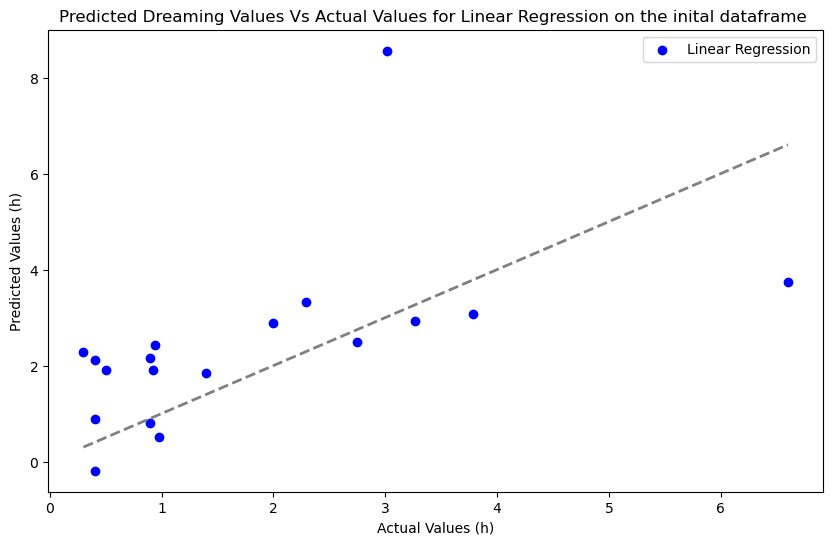

In [40]:
# We evaluate the model by calculating the MSE and plotting the predicted values Vs the actual values
plt.figure(figsize=(10, 6))

plt.scatter(y_test_ttsleep, y_pred_ttsleep, color='blue', label='Linear Regression')
plt.plot([min(y_test_ttsleep), max(y_test_ttsleep)], [min(y_test_ttsleep), max(y_test_ttsleep)], linestyle='--', color='gray', linewidth=2, label='Perfect Fit')
plt.title('Predicted TotalSleep values Vs Actual values for Linear Regression on the initial dataframe')
plt.xlabel('Actual Values (h)')
plt.ylabel('Predicted Values (h)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Example: Plotting predicted vs. actual values for Linear Regression
plt.scatter(y_test_dreaming, y_pred_dreaming, color='blue', label='Linear Regression')
plt.plot([min(y_test_dreaming), max(y_test_dreaming)], [min(y_test_dreaming), max(y_test_dreaming)], linestyle='--', color='gray', linewidth=2)
plt.title('Predicted Dreaming Values Vs Actual Values for Linear Regression on the inital dataframe ')
plt.xlabel('Actual Values (h)')
plt.ylabel('Predicted Values (h)')
plt.legend()
plt.show()

### Based on the plot and on the RMSE for TotalSleep (3.48  h ) and Dreaming (1.76 h), the linear regression model doesn't accurately predict the TotalSleep and dreaming features, this could be explained by the low volume of data in our dataframe. To fix this issue, we apply the SMOTE on our dataframe to generate extra rows.

## V.2 Linear Regression on a SMOTE dataframe

## Using SMOTE to create synthetic rows for our machine learning models
### SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
### We decide to use Vore for our SMOTE, since Vore has the less classes from all our categorical features. Choosing it would be a great way to group our mammals into a few number of classes.
### Vore has 4 classes so we will be using smote in a multi classification context.

In [41]:
#Selecting vore column as y and the rest as X
data = df.values
y = data[:, 4]

X = np.delete(data, 4, axis=1)


In [42]:
from collections import Counter
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# Let's viw how the classes are distributed before SMOTE
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.2f%%)' % (k, v, per))

Class=1, n=37 (42.53%)
Class=3, n=20 (22.99%)
Class=0, n=22 (25.29%)
Class=2, n=8 (9.20%)


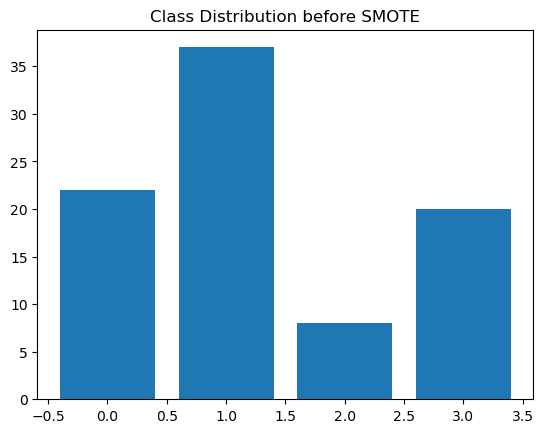

In [43]:
# plot the distribution in order class 1 2 then 3
plt.bar(counter.keys(), counter.values())
plt.title('Class Distribution before SMOTE')
plt.show()

In [44]:
from imblearn.over_sampling import SMOTE

# X and y are our feature matrix and target variable
# Encoding the target variable
y = LabelEncoder().fit_transform(y)

# Defining the total number of samples you want after resampling
total_samples = 1000

# Calculating the desired sampling ratio based on the class distribution
class_counts = Counter(y)
sampling_ratio = {cls: int(total_samples * count / len(y)) for cls, count in class_counts.items()}

# Applying SMOTE with the desired sampling ratio and a fixed random_state
oversample = SMOTE(sampling_strategy=sampling_ratio, random_state=42)  # Use any seed value you prefer
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Summarizing class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))


c:\Users\akram\anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (425) in class 1 will be larger than the number of samples in the majority class (class #1 -> 37)
  warnings.warn(
c:\Users\akram\anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (229) in class 3 will be larger than the number of samples in the majority class (class #1 -> 37)
  warnings.warn(
c:\Users\akram\anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (252) in class 0 will be larger than the number of samples in the majority class (class #1 -> 37)
  warnings.warn(
c:\Users\akram\anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (91) in class 2 will be larger than the number of samples in the majority class (class #1 -> 37)
  warnings.warn(


After SMOTE: Counter({1: 425, 0: 252, 3: 229, 2: 91})


Class=1, n=425 (42.628%)
Class=3, n=229 (22.969%)
Class=0, n=252 (25.276%)
Class=2, n=91 (9.127%)


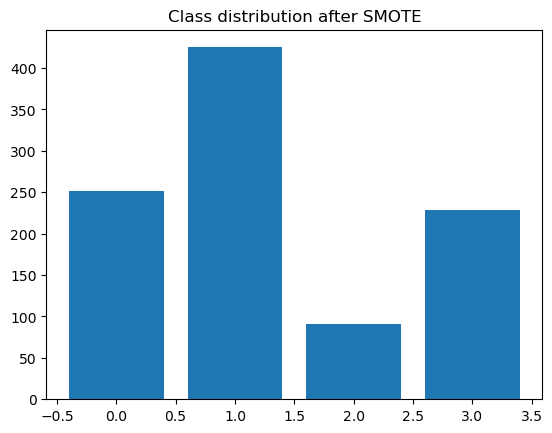

In [45]:
# summarize distribution after SMOTE
counter = Counter(y_resampled)
from collections import Counter
for k,v in counter.items():
 per = v / len(y_resampled) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.title('Class distribution after SMOTE')
plt.show()

### The vore classes kept the same distribution before and after SMOTE, meaning that biais is less likely to be introduced.

In [46]:
#getting ready to replace X with column names
dfv = df.drop(columns=['Vore'])
# Converting X_ and y_resampled to DataFrame
df_features = pd.DataFrame(X_resampled, columns=dfv.columns)

df_target = pd.DataFrame(y_resampled, columns=['Vore'])

# Concatenating X and y to create oversampled dataframe
df_smote = pd.concat([df_features, df_target], axis=1)



### We have now a new dataframe with 1000 rows and no missing values.

### Now that the additional lines have been added, it's important to check if this data still has the same correlation in regard to TotalSleep and Dreaming, by checking the correlation coefficients.

In [47]:
#We compare the correlation coefficients for TotalSleep before and after SMOTE
correlation_matrix = df_smote.corr()
target_correlation = correlation_matrix['TotalSleep'].abs().sort_values(ascending=False)
print(target_correlation)
correlation_matrix = df.corr()
target_correlation = correlation_matrix['TotalSleep'].abs().sort_values(ascending=False)
print(target_correlation)

Awake           1.000000
TotalSleep      1.000000
NonDreaming     0.950613
Exposure        0.743210
Gestation       0.685877
Dreaming        0.672888
Danger          0.569819
LifeSpan        0.494540
BrainWt         0.361023
BodyWt          0.337479
Predation       0.306325
Species         0.209543
Order           0.153996
Conservation    0.142147
Genus           0.114260
Family          0.049097
Vore            0.042810
Name: TotalSleep, dtype: float64
Awake           1.000000
TotalSleep      1.000000
NonDreaming     0.938516
Exposure        0.710701
Dreaming        0.687006
Gestation       0.660818
Danger          0.525691
LifeSpan        0.464887
BrainWt         0.319476
BodyWt          0.310119
Predation       0.230742
Species         0.214370
Conservation    0.141664
Order           0.124571
Vore            0.065938
Genus           0.040968
Family          0.021276
Name: TotalSleep, dtype: float64


In [48]:
#We compare the correlation coefficients for Dreaming before and after SMOTE
correlation_matrix = df_smote.corr()
target_correlation = correlation_matrix['Dreaming'].abs().sort_values(ascending=False)

print(target_correlation)
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Dreaming'].abs().sort_values(ascending=False)
print(target_correlation)

Dreaming        1.000000
TotalSleep      0.672888
Awake           0.672888
Exposure        0.543925
NonDreaming     0.472583
Danger          0.471851
Gestation       0.451829
LifeSpan        0.401243
Predation       0.241493
Conservation    0.124875
Vore            0.120074
Genus           0.102896
Species         0.096557
Order           0.086135
BrainWt         0.057581
BodyWt          0.033342
Family          0.024493
Name: Dreaming, dtype: float64
Dreaming        1.000000
Awake           0.687006
TotalSleep      0.687006
Exposure        0.505899
NonDreaming     0.472658
Gestation       0.404799
Danger          0.404563
LifeSpan        0.348437
Predation       0.163287
Conservation    0.142201
Species         0.115733
Vore            0.096868
Order           0.087734
Family          0.042992
Genus           0.033816
BrainWt         0.015522
BodyWt          0.002895
Name: Dreaming, dtype: float64


### We see that the patterns in correlations are consistent between the initial and SMOTE dataframes. Minimal error for coefficients lower than 0.1 can be noticed but these minimal errors won't affect much our results. We can therefore use the SMOTE dataframe in our prediction models.

In [49]:
# X contains all the selected features, and y contains the target variable
X_sleep = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','Genus','BrainWt','Order','Conservation','Species','Family'], axis=1)  # Drop the target variable column
y_sleep = df_smote['TotalSleep']


# We split the dataset into training and testing sets
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(X_sleep, y_sleep, test_size=0.2, random_state=42)

# we initialize and train the model
model = LinearRegression()
model.fit(X_train_sleep, y_train_sleep)
y_lin_sleep = model.predict(X_test_sleep)

# Evaluate the model
mse_lin_sleep = mean_squared_error(y_test_sleep, y_lin_sleep)
print(f'Mean Squared Error: {mse_lin_sleep} h^2')
print(f'Mean Squared Error: {np.sqrt(mse_lin_sleep)} h')

# X contains all the selected features, and y contains the target variable
X_dreaming = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','Species','BodyWt','BrainWt','Genus'], axis=1)  # Drop the target variable column
y_dreaming = df_smote['Dreaming']

# Split the dataset into training and testing sets
X_train_dreaming, X_test_dreaming, y_train_dreaming, y_test_dreaming = train_test_split(X_dreaming, y_dreaming, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_dreaming, y_train_dreaming)
y_lin_dreaming = model.predict(X_test_dreaming)

# Evaluate the model
mse_lin_dreaming = mean_squared_error(y_test_dreaming, y_lin_dreaming)
print(f'Mean Squared Error: {mse_lin_dreaming} h^2')
print(f'Mean Squared Error: {np.sqrt(mse_lin_dreaming)} h')

Mean Squared Error: 4.6436700767318175 h^2
Mean Squared Error: 2.154917649640426 h
Mean Squared Error: 0.6219785028756623 h^2
Mean Squared Error: 0.7886561372839638 h


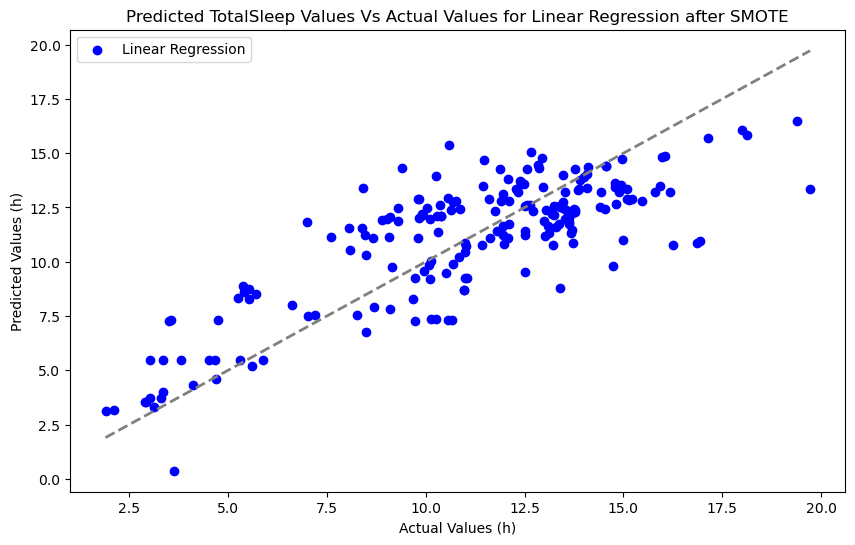

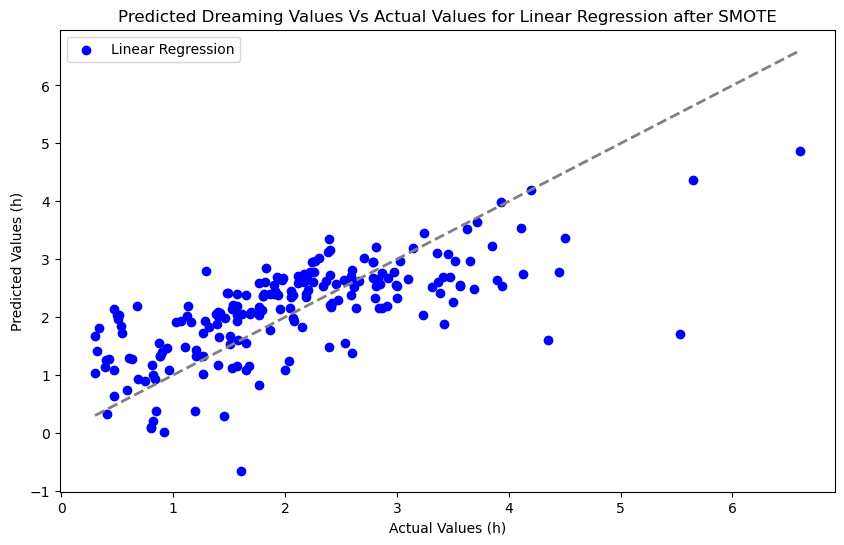

In [50]:
plt.figure(figsize=(10, 6))

# Plotting the totalsleep predicted values vs. actual values with Linear Regression
plt.scatter(y_test_sleep, y_lin_sleep, color='blue', label='Linear Regression')
plt.plot([min(y_test_sleep), max(y_test_sleep)], [min(y_test_sleep), max(y_test_sleep)], linestyle='--', color='gray', linewidth=2)
plt.title('Predicted TotalSleep Values Vs Actual Values for Linear Regression after SMOTE')
plt.xlabel('Actual Values (h)')
plt.ylabel('Predicted Values (h)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

# Plotting the Dreaming predicted values vs. actual values with Linear Regression
plt.scatter(y_test_dreaming, y_lin_dreaming, color='blue', label='Linear Regression')
plt.plot([min(y_test_dreaming), max(y_test_dreaming)], [min(y_test_dreaming), max(y_test_dreaming)], linestyle='--', color='gray', linewidth=2)
plt.title('Predicted Dreaming Values Vs Actual Values for Linear Regression after SMOTE')
plt.xlabel('Actual Values (h)')
plt.ylabel('Predicted Values (h)')
plt.legend()
plt.show()

### The SMOTE dataframe helped our model in reaching a better prediction, as we managed to lower the TotalSleep MSE from 12.11 to 4.64, and the Dreaming MSE from 3.11 to 0.62.
### The Root Mean Squared error for this model is 2.15 h for TotalSleep and 0.79 h for Dreaming, meaning that on average the Linear Regression Model is off by 129 minutes for TotalSleep and 47 minutes for Dreaming.
### Even though the MSE is now lower, the model isn't giving satisfactory results yet. We decide to explore other models than linear regression, to see if we can get a better accuracy. 

## IV.3 Random Forest Regression on our SMOTE dataframe

### A Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the mode or mean prediction of the individual trees for classification tasks.
### We'll be using our SMOTE dataframe in the model


In [51]:
from sklearn.ensemble import RandomForestRegressor
#### We train the model for both TotalSleep and Dreaming using most of the features first
# X contains all the selected features, and y contains the target variable
X_rf_ttsleep = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','BrainWt'], axis=1)  # Drop the target variable column
y_rf_ttsleep = df_smote['TotalSleep']


# we plit the dataset into training and testing sets
X_train_rf_ttsleep , X_test_rf_ttsleep , y_train_rf_ttsleep , y_test_rf_ttsleep  = train_test_split(X_rf_ttsleep , y_rf_ttsleep , test_size=0.2, random_state=42)

# Assuming rf is our RandomForestRegressor model
rf = RandomForestRegressor(300, random_state=42)
rf.fit(X_train_rf_ttsleep , y_train_rf_ttsleep )
y_rf_ttsleep = rf.predict(X_test_rf_ttsleep)

#we evaluate the model
mse_rf_ttsleep = mean_squared_error(y_test_rf_ttsleep, y_rf_ttsleep)
print(f'Mean Squared Error for TotalSleep using Random Forest: {mse_rf_ttsleep} h^2')
print(f'Root Mean Squared Error for TotalSleep using Random Forest: {np.sqrt(mse_rf_ttsleep)} h')
# Get feature importances
feature_importances_ttsleep = rf.feature_importances_

# we create a DataFrame to display feature importances
importances_df_rf_ttsleep = pd.DataFrame({'Feature': X_rf_ttsleep.columns, 'Importance': feature_importances_ttsleep})
importances_df_rf_ttsleep =importances_df_rf_ttsleep.sort_values(by='Importance', ascending=False)


# X contains all the selected features, and y contains the target variable
X_rf_dreaming = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','BrainWt'], axis=1)  # Drop the target variable column
y_rf_dreaming = df_smote['Dreaming']


# we split the dataset into training and testing sets
X_train_rf_dreaming, X_test_rf_dreaming, y_train_rf_dreaming, y_test_rf_dreaming = train_test_split(X_rf_dreaming, y_rf_dreaming, test_size=0.2, random_state=42)

# Assuming rf is our RandomForestRegressor modell
rf = RandomForestRegressor(300, random_state=42)
rf.fit(X_train_rf_dreaming, y_train_rf_dreaming)
y_rf_dreaming = rf.predict(X_test_rf_dreaming)

#we evaluate the model
mse_rf_dreaming = mean_squared_error(y_test_rf_dreaming, y_rf_dreaming)
print(f'Mean Squared Error for Dreaming using Random Forest: {mse_rf_dreaming} h^2')
print(f'Root Mean Squared Error for Dreaming using Random Forest: {np.sqrt(mse_rf_dreaming)} h')
# Get feature importances
feature_importances_rf_dreaming = rf.feature_importances_

# we create a DataFrame to display feature importances
importances_df_rf_dreaming = pd.DataFrame({'Feature': X_rf_dreaming.columns, 'Importance': feature_importances_rf_dreaming})
importances_df_rf_dreaming = importances_df_rf_dreaming.sort_values(by='Importance', ascending=False)


Mean Squared Error for TotalSleep using Random Forest: 0.7091861278363285 h^2
Root Mean Squared Error for TotalSleep using Random Forest: 0.8421318945606612 h
Mean Squared Error for Dreaming using Random Forest: 0.08805078385742196 h^2
Root Mean Squared Error for Dreaming using Random Forest: 0.2967335233124528 h


### One of the most important variables that influences our Random Forest results is the feature selection. For linear regression, the correlation matrix helps choose the features that will minimize the error, but for non linear models as Random Forest and XGBoost, the importance coefficients are one of the metrics that will determine what features are selected.
### We trained the model at first with most of the features, we extracted the features' importance coefficients and we will run the model again based on them.

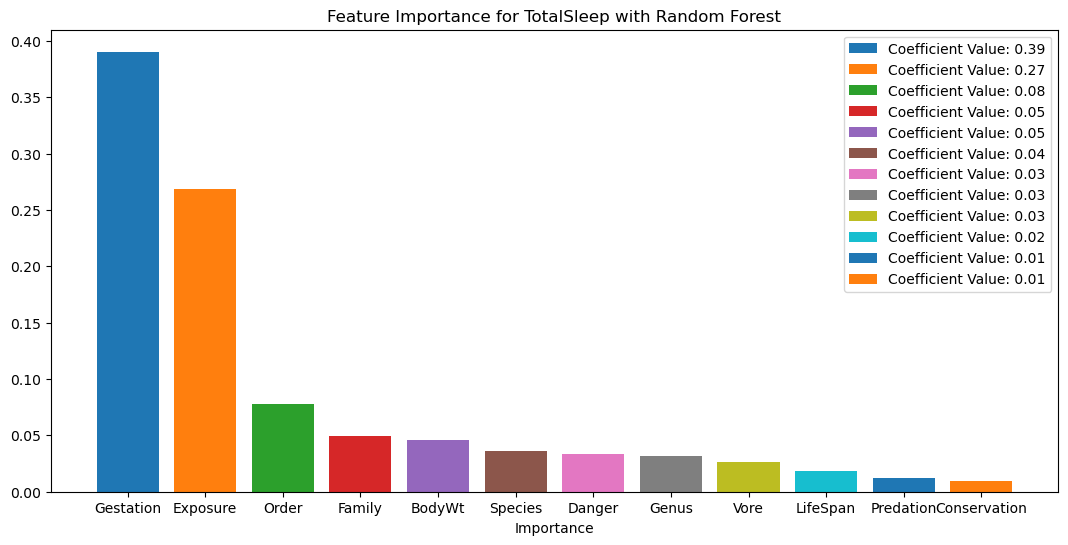

In [52]:
#We plot the extracted importance coefficients for TotalSleep

plt.figure(figsize=(13, 6))
for index, row in importances_df_rf_ttsleep.iterrows():
    plt.bar(row['Feature'], row['Importance'], label=f'Coefficient Value: {row["Importance"]:.2f}')
plt.xlabel('Importance')
plt.title('Feature Importance for TotalSleep with Random Forest')
plt.legend([f'Coefficient Value: {importance:.2f}' for importance in importances_df_rf_ttsleep['Importance']])
plt.show()


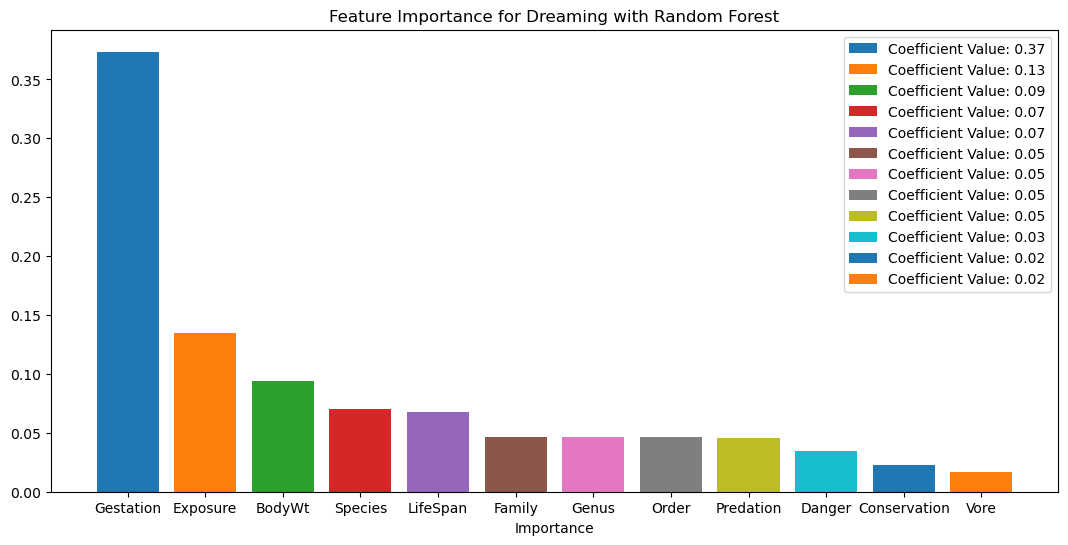

In [53]:
plt.figure(figsize=(13, 6))
for index, row in importances_df_rf_dreaming.iterrows():
    plt.bar(row['Feature'], row['Importance'], label=f'Coefficient Value: {row["Importance"]:.2f}')
plt.xlabel('Importance')
plt.title('Feature Importance for Dreaming with Random Forest')
plt.legend([f'Coefficient Value: {importance:.2f}' for importance in importances_df_rf_dreaming['Importance']])
plt.show()

### The TotalSleep Random Forest MSE before importance feature selection  is 0.71 h^2
### The Dreaming Random Froest MSE before importance feature selection is: 0.09 h^2

### We notice that all the features contribute to the model and we can therefore keep these same feature selections for TotalSleep and Dreaming


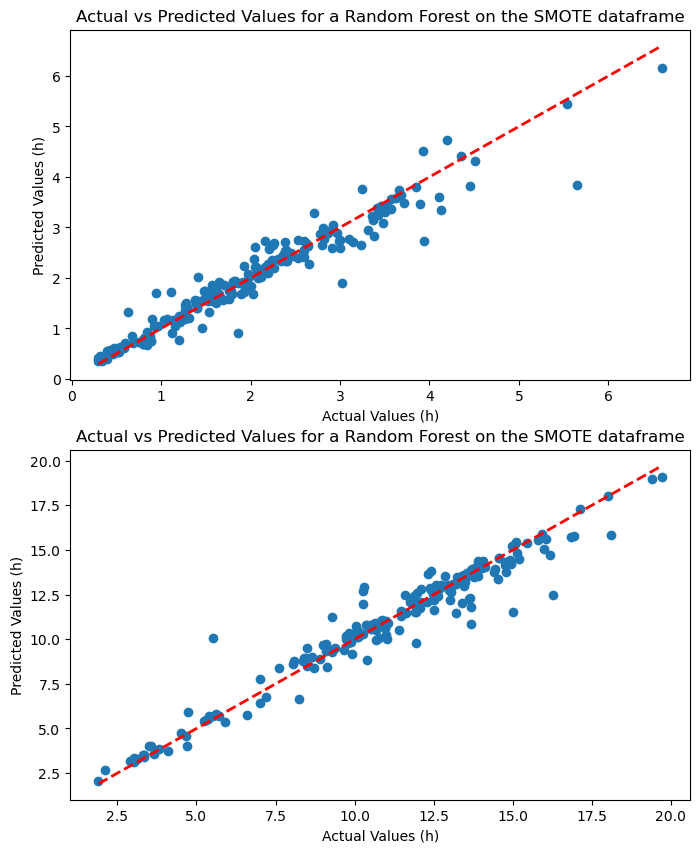

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

axes[0].scatter(y_test_rf_dreaming, y_rf_dreaming)
axes[0].plot([min(y_test_rf_dreaming), max(y_test_rf_dreaming)], [min(y_test_rf_dreaming), max(y_test_rf_dreaming)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Values (h)')
axes[0].set_ylabel('Predicted Values (h)')
axes[0].set_title('Actual vs Predicted Values for a Random Forest on the SMOTE dataframe')


axes[1].scatter(y_test_rf_ttsleep, y_rf_ttsleep)
axes[1].plot([min(y_test_rf_ttsleep), max(y_test_rf_ttsleep)], [min(y_test_rf_ttsleep), max(y_test_rf_ttsleep)], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Values (h)')
axes[1].set_ylabel('Predicted Values (h)')
axes[1].set_title('Actual vs Predicted Values for a Random Forest on the SMOTE dataframe')
plt.show()

### The Random Forest model seems to predict the TotalSleep and Dreaming values more accurately than Linear Regression (MSE of 0.71 h^2 and 0.09 h^2 Vs 4.64 h^2 and 0.62 h^2). The Root Mean Squared error for this model is 0.84 h for TotalSleep and 0.3 h for Dreaming, meaning that on average the Random Forest prediction is off by 51 minutes for TotalSleep and 18 minutes for Dreaming.

## IV.4 XGBoost Model

### XGBoost (Extreme Gradient Boosting) is a powerful Gradient boosting ensemble algorithm that can  be used for both regression and classification tasks. This algorithm handles complex relationships, overcomes bias-variance tradeoff, and incorporates regularization.

### Just like with Random Forest, we start by running the model with most of the features, and then we analyse the feature importances to eventually run again the model if needed.

In [55]:
from xgboost import XGBRegressor
# X contains all the selected features, and y contains the target variable (TotalSLeep)
X_gb_ttsleep = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','BrainWt'], axis=1)  # Drop the target variable column
y_gb_ttsleep = df_smote['TotalSleep']


# Split the dataset into training and testing sets
X_train_gb_ttsleep , X_test_gb_ttsleep , y_train_gb_ttsleep , y_test_gb_ttsleep  = train_test_split(X_gb_ttsleep , y_gb_ttsleep , test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_gb_ttsleep, y_train_gb_ttsleep)

y_pred_gb_ttsleep = xgb_model.predict(X_test_gb_ttsleep)

# Evaluating the model
mse_gb_ttsleep = mean_squared_error(y_test_gb_ttsleep, y_pred_gb_ttsleep)
print(f'Mean Squared Error for TotalSleep: {mse_gb_ttsleep} h^2')
print(f'Root Mean Squared Error for TotalSleep: {np.sqrt(mse_gb_ttsleep)} h')
# Getting feature importances
feature_importances_gb_ttsleep = xgb_model.feature_importances_
# Creating a DataFrame to display feature importances
importances_df_gb_ttsleep = pd.DataFrame({'Feature': X_gb_ttsleep.columns, 'Importance': feature_importances_gb_ttsleep})
importances_df_gb_ttsleep = importances_df_gb_ttsleep.sort_values(by='Importance', ascending=False)



# X contains all the selected features, and y contains the target variable (Dreaming)
X_gb_dreaming = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','BrainWt'], axis=1)  # Drop the target variable column
y_gb_dreaming = df_smote['Dreaming']


# Splitting the dataset into training and testing sets
X_train_gb_dreaming, X_test_gb_dreaming, y_train_gb_dreaming, y_test_gb_dreaming = train_test_split(X_gb_dreaming, y_gb_dreaming, test_size=0.2, random_state=42)

# Assuming rf is your RandomForestRegressor model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_gb_dreaming, y_train_gb_dreaming)
y_pred_gb_dreaming = xgb_model.predict(X_test_gb_dreaming)

# Evaluating the model
mse_gb_dreaming = mean_squared_error(y_test_gb_dreaming, y_pred_gb_dreaming)
print(f'Mean Squared Error for Dreaming: {mse_gb_dreaming} h^2')
print(f'Root Mean Squared Error for Dreaming: {np.sqrt(mse_gb_dreaming)} h')

feature_importances_gb_dreaming = xgb_model.feature_importances_
# Creating a DataFrame to display feature importances
importances_df_gb_dreaming = pd.DataFrame({'Feature': X_gb_dreaming.columns, 'Importance': feature_importances_gb_dreaming})
importances_df_gb_dreaming = importances_df_gb_dreaming.sort_values(by='Importance', ascending=False)

Mean Squared Error for TotalSleep: 0.641159422888714 h^2
Root Mean Squared Error for TotalSleep: 0.8007243114135564 h
Mean Squared Error for Dreaming: 0.08330082653313559 h^2
Root Mean Squared Error for Dreaming: 0.2886188256734747 h


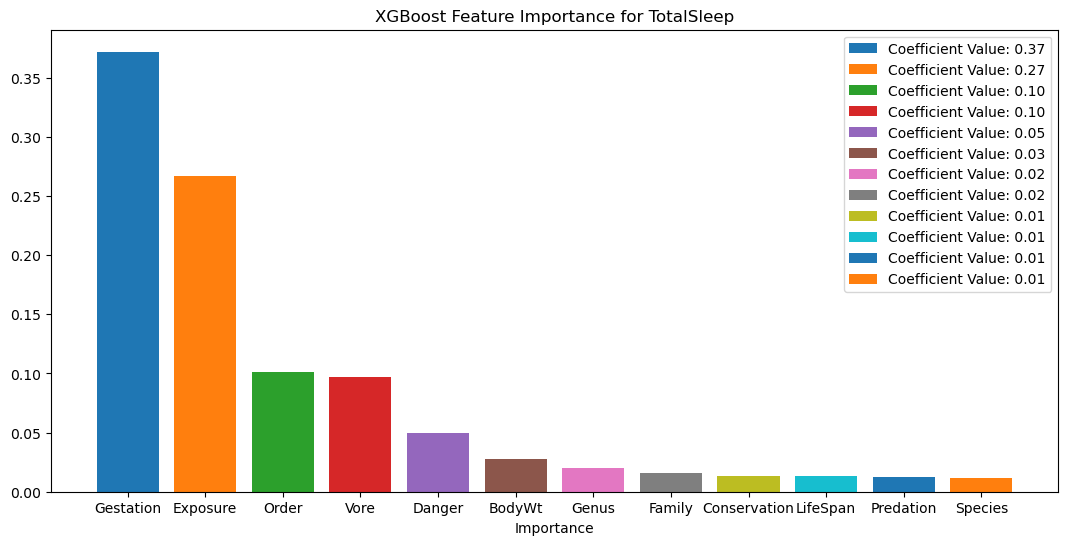

In [56]:
plt.figure(figsize=(13, 6))
for index, row in importances_df_gb_ttsleep.iterrows():
    plt.bar(row['Feature'], row['Importance'], label=f'Coefficient Value: {row["Importance"]:.2f}')
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance for TotalSleep')
plt.legend([f'Coefficient Value: {importance:.2f}' for importance in importances_df_gb_ttsleep['Importance']])
plt.show()

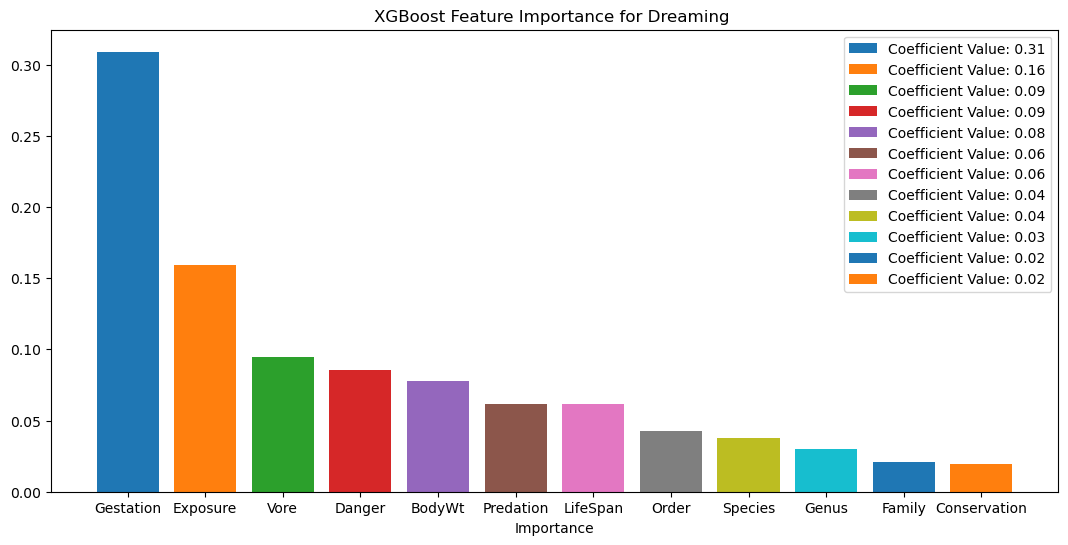

In [57]:
plt.figure(figsize=(13, 6))
for index, row in importances_df_gb_dreaming.iterrows():
    plt.bar(row['Feature'], row['Importance'], label=f'Coefficient Value: {row["Importance"]:.2f}')
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance for Dreaming ')
plt.legend([f'Coefficient Value: {importance:.2f}' for importance in importances_df_gb_dreaming['Importance']])
plt.show()

### We notice that for both TotalSleep and Dreaming, the features selected contribute to the prediction. Keeping this selection produces the lowest MSE, we can therefore validate it for our model.

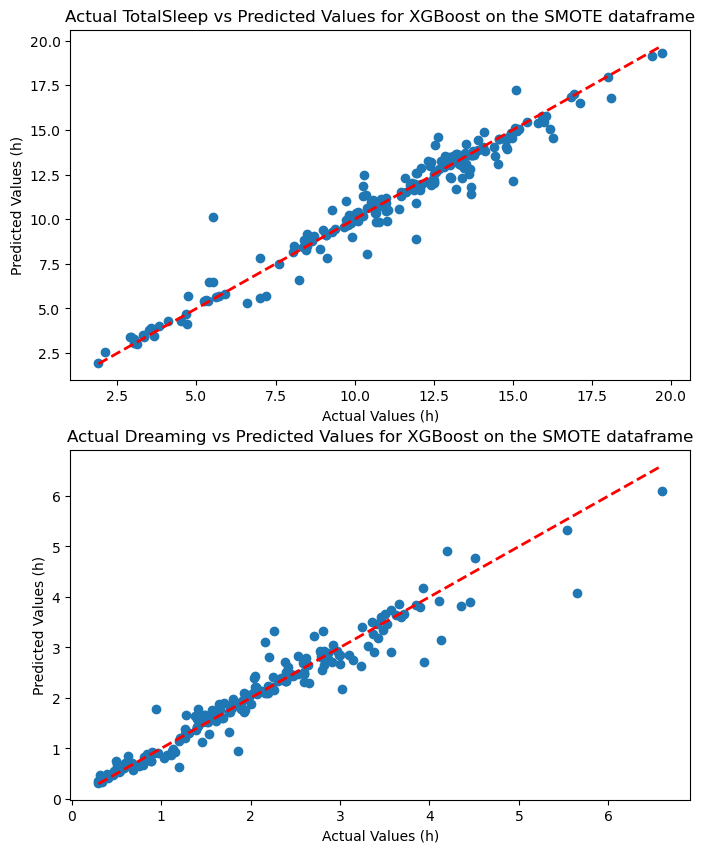

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

axes[1].scatter(y_test_gb_dreaming, y_pred_gb_dreaming)
axes[1].plot([min(y_test_gb_dreaming), max(y_test_gb_dreaming)], [min(y_test_gb_dreaming), max(y_test_gb_dreaming)], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Values (h)')
axes[1].set_ylabel('Predicted Values (h)')
axes[1].set_title('Actual Dreaming vs Predicted Values for XGBoost on the SMOTE dataframe')


axes[0].scatter(y_test_gb_ttsleep, y_pred_gb_ttsleep)
axes[0].plot([min(y_test_gb_ttsleep), max(y_test_gb_ttsleep)], [min(y_test_gb_ttsleep), max(y_test_gb_ttsleep)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Values (h)')
axes[0].set_ylabel('Predicted Values (h)')
axes[0].set_title('Actual TotalSleep vs Predicted Values for XGBoost on the SMOTE dataframe')
plt.show()

### The XGBoost model seems to predict the TotalSleep and Dreaming values more accurately than Random Forest (MSE of 0.64 h^2 and 0.08 h^2 Vs 0.71 h^2 and 0.09 h^2 ). The Root Mean Squared error for this model is 0.8 h for TotalSleep and 0.28 h for Dreaming, meaning that on average the XGboost prediction is off by 48 minutes for TotalSleep and 17 minutes for Dreaming.

## IV.5 Neural Network Model

### A neural network model is a computational model inspired by the structure and functioning of the human brain. It consists of interconnected nodes, organised in layers, where each node (or neuron) processes information and contributes to the overall computation. Neural networks are designed to learn patterns and relationships in data, adapting their parameters through a training process to make accurate predictions or classifications. The architecture includes an input layer, hidden layers for feature representation, and an output layer for producing the final prediction. 

In [ ]:
# Set the random seed for reproducibility
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
tf.random.set_seed(42)

# X and y are our feature matrix and target variable (TotalSleep)
# Splitting the data into training and testing sets for TotalSleep
X_nn_ttsleep = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','Species','BodyWt','BrainWt','Conservation'], axis=1)
y_nn_ttsleep = df_smote['TotalSleep']

# Standardizing the input features
scaler = StandardScaler()
X_train_nn_ttsleep, X_test_nn_ttsleep, y_train_nn_ttsleep, y_test_nn_ttsleep = train_test_split(X_nn_ttsleep, y_nn_ttsleep, test_size=0.2, random_state=42)
X_train_scaled_nn_ttsleep = scaler.fit_transform(X_train_nn_ttsleep)
X_test_scaled_nn_ttsleep = scaler.transform(X_test_nn_ttsleep)

model_ttsleep = Sequential()
model_ttsleep.add(Dense(units=100, activation='relu', input_dim=X_train_scaled_nn_ttsleep.shape[1]))
model_ttsleep.add(Dense(units=1))  # Output layer for regression task

# Compiling the model
model_ttsleep.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history_ttsleep = model_ttsleep.fit(X_train_scaled_nn_ttsleep, y_train_nn_ttsleep, epochs=1000, batch_size=32, validation_data=(X_test_scaled_nn_ttsleep, y_test_nn_ttsleep))

# Evaluating the model on the test set
y_pred_nn_ttsleep = model_ttsleep.predict(X_test_scaled_nn_ttsleep)
mse_nn_ttsleep = mean_squared_error(y_test_nn_ttsleep, y_pred_nn_ttsleep)


In [60]:
print(f'Mean Squared Error (TotalSleep): {mse_nn_ttsleep} h^2')
print(f'Root Mean Squared Error (TotalSleep): {np.sqrt(mse_nn_ttsleep)} h')

Mean Squared Error (TotalSleep): 0.23354456587655348 h^2
Root Mean Squared Error (TotalSleep): 0.4832644885324738 h


### For TotalSleep, in the code above, we set the number of neuron in the dense layer to 100, this gave the best result Vs time of execution.
### We also set EPOCH to 1000, which represents the number of iterations over the entire dataset during the training process.
### We changed these 2 variables multiple times, but we found that these two values were ideal, as we managed to lower the MSE without having a too long execution time

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# X and y are our feature matrix and target variable (Dreaming)
# Split the data into training and testing sets for Dreaming
X_nn_dreaming = df_smote.drop(['Awake','Dreaming','NonDreaming','TotalSleep','Species','BodyWt','BrainWt'], axis=1)
y_nn_dreaming = df_smote['Dreaming']

# Standardizing the input features (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_nn_dreaming, X_test_nn_dreaming, y_train_nn_dreaming, y_test_nn_dreaming = train_test_split(X_nn_dreaming, y_nn_dreaming, test_size=0.2, random_state=42)
X_train_scaled_nn_dreaming = scaler.fit_transform(X_train_nn_dreaming)
X_test_scaled_nn_dreaming = scaler.transform(X_test_nn_dreaming)

model_dreaming = Sequential()
model_dreaming.add(Dense(units=100, activation='relu', input_dim=X_train_scaled_nn_dreaming.shape[1]))
model_dreaming.add(Dense(units=1))  # Output layer for regression task

# Compiling the model
model_dreaming.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history_dreaming = model_dreaming.fit(X_train_scaled_nn_dreaming, y_train_nn_dreaming, epochs=600, batch_size=32, validation_data=(X_test_scaled_nn_dreaming, y_test_nn_dreaming))

# Evaluating the model on the test set
y_pred_nn_dreaming = model_dreaming.predict(X_test_scaled_nn_dreaming)
mse_nn_dreaming = mean_squared_error(y_test_nn_dreaming, y_pred_nn_dreaming)



In [62]:
print(f'Mean Squared Error (Dreaming): {mse_nn_dreaming} h^2')
print(f'Mean Squared Error (Dreaming): {np.sqrt(mse_nn_dreaming)} h')

Mean Squared Error (Dreaming): 0.04432392385948521 h^2
Mean Squared Error (Dreaming): 0.21053247697085886 h


### For dreaming, in the code above, we set the number of neuron in the dense layer to 100, this gave the best result Vs time of execution.
### We also set EPOCH to 600, which represents the number of iterations over the entire dataset during the training process.
### We changed these 2 variables multiple times, but we found that these two values were ideal, as we managed to lower the MSE without having a too long execution time

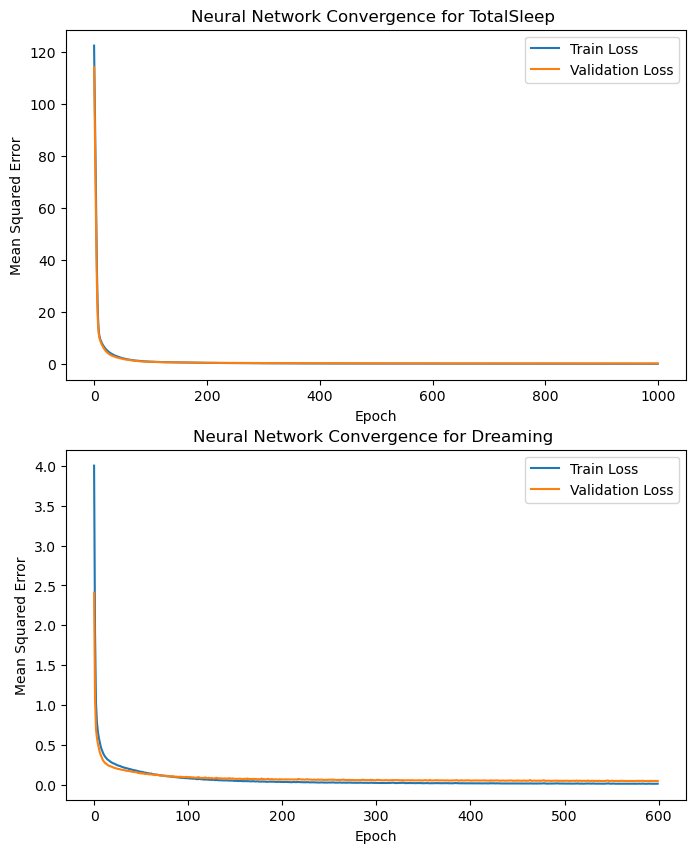

In [63]:
#Plot training history
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
axes[0].plot(history_ttsleep.history['loss'], label='Train Loss')
axes[0].plot(history_ttsleep.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Neural Network Convergence for TotalSleep ')
axes[0].legend()
axes[1].plot(history_dreaming.history['loss'], label='Train Loss')
axes[1].plot(history_dreaming.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('Neural Network Convergence for Dreaming ')
axes[1].legend()
plt.show()

### For both TotalSleep and Dreaming, we can confirm that convergence has been reached.
### We have no signs of overfitting ( we don't have a decreasing training loss and an increasing validation loss)
### It looks like the loss curve is reaching a plateau, meaning that the model has learned as much as it can from the current data and further training may not significantly improve performance.

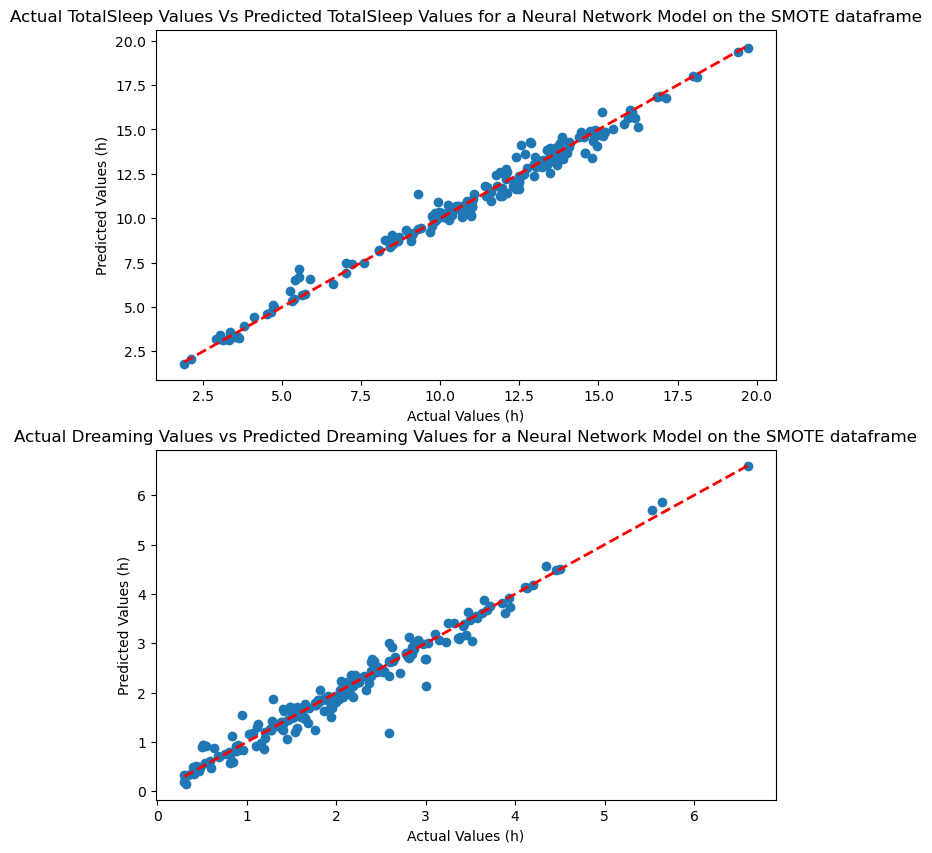

In [64]:
# Plot predicted vs actual values
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
axes[0].scatter(y_test_nn_ttsleep, y_pred_nn_ttsleep)
axes[0].plot([min(y_test_nn_ttsleep), max(y_test_nn_ttsleep)], [min(y_test_nn_ttsleep), max(y_test_nn_ttsleep)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Values (h)')
axes[0].set_ylabel('Predicted Values (h)')
axes[0].set_title('Actual TotalSleep Values Vs Predicted TotalSleep Values for a Neural Network Model on the SMOTE dataframe')

axes[1].scatter(y_test_nn_dreaming, y_pred_nn_dreaming)
axes[1].plot([min(y_test_nn_dreaming), max(y_test_nn_dreaming)], [min(y_test_nn_dreaming), max(y_test_nn_dreaming)], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Values (h)')
axes[1].set_ylabel('Predicted Values (h)')
axes[1].set_title('Actual Dreaming Values vs Predicted Dreaming Values for a Neural Network Model on the SMOTE dataframe')
plt.show()

### The MSE values are between 0.2 h^2 and 0.3 h^2 for TotalSleep and between 0.04 h^2 and 0.05 h^2 for Dreaming
### The Root Mean Squared error for this model is between 27 minutes and 33 minutes for TotalSleep and between 12 minutes and 14 minutes for Dreaming, meaning that on average our neural network model is off by 30 minutes for TotalSleep and 13 minutes for Dreaming.
### The RMSE values, compared to the mean values of TotalSleep and Dreaming, shows that our model is off on average by 4% for Totalsleep and 5% for Dreaming
### The predicted values represented on the plots are mostly close to the actual values
### The TotalSleep and Dreaming prediction is at this point good enough.

# V- Conclusion

### Comparing the MSE of the different models shows that :
   ### -We cannot build a model that's accurate enough without SMOTE, since our initial dataframe had 87 rows.
   ### -With an RMSE of 129 minutes for TotalSleep and 47 minutes for Dreaming after SMOTE, linear regression doesn't give satisfactory     results, even after changing the feature selection.
   ### -Random Forest gets us better results than linear regression, with an RMSE of 51 minutes for TotalSleep and 18 minutes for Dreaming
   ### -XGBoost does an even better job at predicting our features, with an RMSE of 48 minutes for TotalSleep and 17 minutes for Dreaming
  ###  -The most accurate prediction was given by the neural network model, with an RMSE on average of 30 minutes for TotalSleep and 13 minutes for dreaming